# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

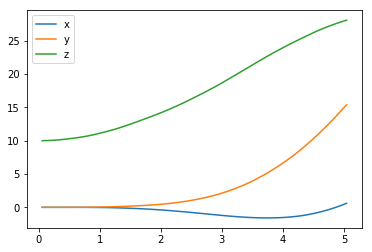

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

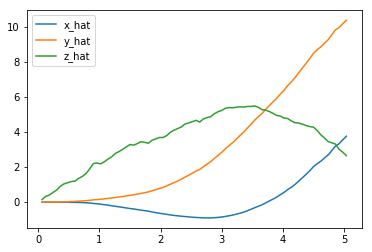

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

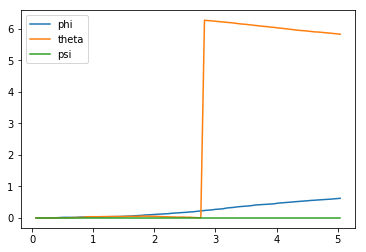

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

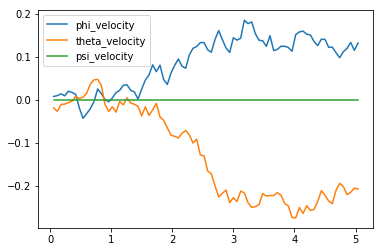

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

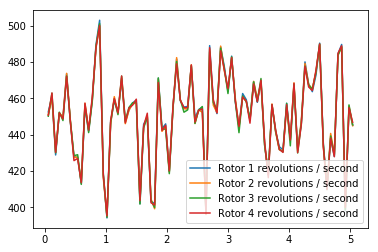

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 0.60579873 15.40575048 28.0878581   0.62148608  5.82885067  0.        ]
[ 3.75530712 10.36608111  2.6493937 ]
[ 0.13147727 -0.20773147  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.764 (best =   0.089), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [48]:
%reload_ext autoreload
%autoreload 2

## TODO: Train your agent here.
import sys
import pandas as pd
from lib.takeoff_task import Takeoff
from agents.agent import DDPG

num_episodes = 200
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 30.])

task = Takeoff(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task) 
scores = []

results_file = 'results7.csv'

with open(results_file, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
    #     print(state)
        while True:
            action = agent.act(state) 
    #         print(action)
            next_state, reward, done = task.step(action)
    #         print(reward)
            agent.step(action, reward, next_state, done)
            state = next_state
            if done:
                print("Episode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                    i_episode, agent.score, agent.best_score), end="")  # [debug]
                
                scores.append(agent.score)

                to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
                break
        sys.stdout.flush()

Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =    1, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =    2, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =    3, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =    4, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.3

Episode =   37, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =   38, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =   39, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =   40, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.392)
Reward =   0.365, z_pose =   0.000, z_velocity =  -0.589)
Episode =   41, score =   1.096 (best =   1.096)Reward =   0.365, z_pose =   0.000, z_velocity =  -0.196)
Reward

Reward =   0.658, z_pose =  13.403, z_velocity =  24.199)
Reward =   0.678, z_pose =  13.889, z_velocity =  24.403)
Reward =   0.699, z_pose =  14.379, z_velocity =  24.598)
Reward =   0.722, z_pose =  14.872, z_velocity =  24.783)
Reward =   0.746, z_pose =  15.370, z_velocity =  24.959)
Reward =   0.772, z_pose =  15.871, z_velocity =  25.126)
Reward =   0.800, z_pose =  16.375, z_velocity =  25.286)
Reward =   0.831, z_pose =  16.882, z_velocity =  25.437)
Reward =   0.864, z_pose =  17.392, z_velocity =  25.582)
Reward =   0.900, z_pose =  17.905, z_velocity =  25.718)
Reward =   0.940, z_pose =  18.421, z_velocity =  25.848)
Reward =   0.983, z_pose =  18.939, z_velocity =  25.971)
Reward =   1.031, z_pose =  19.460, z_velocity =  26.089)
Reward =   1.084, z_pose =  19.983, z_velocity =  26.200)
Reward =   1.143, z_pose =  20.508, z_velocity =  26.306)
Reward =   1.209, z_pose =  21.035, z_velocity =  26.407)
Reward =   1.284, z_pose =  21.564, z_velocity =  26.502)
Reward =   1.3

Reward =   0.154, z_pose = 100.085, z_velocity =  27.239)
Reward =   0.153, z_pose = 100.629, z_velocity =  27.131)
Reward =   0.152, z_pose = 101.170, z_velocity =  27.018)
Reward =   0.151, z_pose = 101.709, z_velocity =  26.899)
Reward =   0.150, z_pose = 102.246, z_velocity =  26.774)
Reward =   0.149, z_pose = 102.780, z_velocity =  26.644)
Reward =   0.147, z_pose = 103.312, z_velocity =  26.508)
Reward =   0.146, z_pose = 103.840, z_velocity =  26.366)
Reward =   0.145, z_pose = 104.366, z_velocity =  26.218)
Reward =   0.144, z_pose = 104.889, z_velocity =  26.065)
Reward =   0.143, z_pose = 105.409, z_velocity =  25.905)
Reward =   0.142, z_pose = 105.925, z_velocity =  25.738)
Reward =   0.141, z_pose = 106.438, z_velocity =  25.565)
Reward =   0.140, z_pose = 106.948, z_velocity =  25.384)
Reward =   0.139, z_pose = 107.454, z_velocity =  25.196)
Reward =   0.138, z_pose = 107.956, z_velocity =  25.001)
Reward =   0.137, z_pose = 108.453, z_velocity =  24.797)
Reward =   0.1

Reward =   1.431, z_pose =  37.497, z_velocity =  28.134)
Reward =   1.332, z_pose =  38.060, z_velocity =  28.168)
Reward =   1.246, z_pose =  38.623, z_velocity =  28.201)
Reward =   1.171, z_pose =  39.188, z_velocity =  28.233)
Reward =   1.104, z_pose =  39.753, z_velocity =  28.263)
Reward =   1.044, z_pose =  40.318, z_velocity =  28.293)
Reward =   0.990, z_pose =  40.884, z_velocity =  28.322)
Reward =   0.941, z_pose =  41.451, z_velocity =  28.351)
Reward =   0.897, z_pose =  42.018, z_velocity =  28.378)
Reward =   0.857, z_pose =  42.586, z_velocity =  28.405)
Reward =   0.820, z_pose =  43.155, z_velocity =  28.431)
Reward =   0.786, z_pose =  43.723, z_velocity =  28.456)
Reward =   0.755, z_pose =  44.293, z_velocity =  28.480)
Reward =   0.726, z_pose =  44.863, z_velocity =  28.503)
Reward =   0.700, z_pose =  45.433, z_velocity =  28.524)
Reward =   0.675, z_pose =  46.004, z_velocity =  28.544)
Reward =   0.652, z_pose =  46.575, z_velocity =  28.562)
Reward =   0.6

Reward =   0.191, z_pose =  84.249, z_velocity = -18.925)
Reward =   0.192, z_pose =  83.864, z_velocity = -19.506)
Reward =   0.194, z_pose =  83.468, z_velocity = -20.082)
Reward =   0.195, z_pose =  83.061, z_velocity = -20.653)
Reward =   0.197, z_pose =  82.642, z_velocity = -21.219)
Reward =   0.198, z_pose =  82.212, z_velocity = -21.781)
Episode =   67, score = 240.464 (best = 240.464)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.554)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.329)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.102)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.870)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.633)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.389)
Reward =   0.372, z_pose =   0.494, z_velocity =   6.138)
Reward =   0.373, z_pose =   0.625, z_velocity =   6.879)
Reward =   0.375, z_pose =   0.770, z_velocity =   7.610)
Reward =   0.377, z_pose

Reward =   0.330, z_pose =  62.218, z_velocity =  25.276)
Reward =   0.325, z_pose =  62.722, z_velocity =  25.065)
Reward =   0.320, z_pose =  63.221, z_velocity =  24.847)
Reward =   0.315, z_pose =  63.716, z_velocity =  24.621)
Reward =   0.310, z_pose =  64.206, z_velocity =  24.387)
Reward =   0.306, z_pose =  64.691, z_velocity =  24.145)
Reward =   0.302, z_pose =  65.171, z_velocity =  23.895)
Reward =   0.298, z_pose =  65.647, z_velocity =  23.637)
Reward =   0.294, z_pose =  66.117, z_velocity =  23.372)
Reward =   0.290, z_pose =  66.582, z_velocity =  23.099)
Reward =   0.286, z_pose =  67.041, z_velocity =  22.818)
Reward =   0.283, z_pose =  67.494, z_velocity =  22.529)
Reward =   0.279, z_pose =  67.942, z_velocity =  22.233)
Reward =   0.276, z_pose =  68.383, z_velocity =  21.930)
Reward =   0.273, z_pose =  68.819, z_velocity =  21.618)
Reward =   0.270, z_pose =  69.248, z_velocity =  21.300)
Reward =   0.267, z_pose =  69.671, z_velocity =  20.974)
Reward =   0.2

Reward =   0.449, z_pose =   5.603, z_velocity =  18.403)
Reward =   0.456, z_pose =   5.975, z_velocity =  18.849)
Reward =   0.463, z_pose =   6.357, z_velocity =  19.279)
Reward =   0.471, z_pose =   6.746, z_velocity =  19.693)
Reward =   0.479, z_pose =   7.144, z_velocity =  20.091)
Reward =   0.488, z_pose =   7.550, z_velocity =  20.474)
Reward =   0.497, z_pose =   7.963, z_velocity =  20.841)
Reward =   0.506, z_pose =   8.383, z_velocity =  21.194)
Reward =   0.517, z_pose =   8.811, z_velocity =  21.532)
Reward =   0.527, z_pose =   9.244, z_velocity =  21.856)
Reward =   0.539, z_pose =   9.685, z_velocity =  22.165)
Reward =   0.551, z_pose =  10.131, z_velocity =  22.462)
Reward =   0.564, z_pose =  10.583, z_velocity =  22.746)
Reward =   0.577, z_pose =  11.041, z_velocity =  23.017)
Reward =   0.591, z_pose =  11.503, z_velocity =  23.275)
Reward =   0.607, z_pose =  11.971, z_velocity =  23.523)
Reward =   0.623, z_pose =  12.444, z_velocity =  23.759)
Reward =   0.6

Reward =   0.198, z_pose =  84.915, z_velocity =  28.052)
Reward =   0.196, z_pose =  85.476, z_velocity =  28.033)
Reward =   0.194, z_pose =  86.036, z_velocity =  28.014)
Reward =   0.192, z_pose =  86.596, z_velocity =  27.994)
Reward =   0.190, z_pose =  87.156, z_velocity =  27.972)
Reward =   0.188, z_pose =  87.715, z_velocity =  27.949)
Reward =   0.186, z_pose =  88.274, z_velocity =  27.925)
Reward =   0.184, z_pose =  88.832, z_velocity =  27.899)
Reward =   0.182, z_pose =  89.390, z_velocity =  27.873)
Reward =   0.181, z_pose =  89.947, z_velocity =  27.844)
Reward =   0.179, z_pose =  90.503, z_velocity =  27.815)
Reward =   0.177, z_pose =  91.059, z_velocity =  27.783)
Reward =   0.176, z_pose =  91.615, z_velocity =  27.750)
Reward =   0.174, z_pose =  92.169, z_velocity =  27.715)
Reward =   0.173, z_pose =  92.723, z_velocity =  27.678)
Reward =   0.171, z_pose =  93.276, z_velocity =  27.639)
Reward =   0.170, z_pose =  93.829, z_velocity =  27.598)
Reward =   0.1

Reward =   1.469, z_pose =  22.630, z_velocity =  26.753)
Reward =   1.582, z_pose =  23.166, z_velocity =  26.841)
Reward =   1.715, z_pose =  23.704, z_velocity =  26.926)
Reward =   1.872, z_pose =  24.243, z_velocity =  27.007)
Reward =   2.061, z_pose =  24.784, z_velocity =  27.084)
Reward =   2.293, z_pose =  25.326, z_velocity =  27.159)
Reward =   2.584, z_pose =  25.870, z_velocity =  27.230)
Reward =   2.962, z_pose =  26.415, z_velocity =  27.298)
Reward =   3.470, z_pose =  26.962, z_velocity =  27.363)
Reward =   4.192, z_pose =  27.510, z_velocity =  27.427)
Reward =   5.298, z_pose =  28.059, z_velocity =  27.487)
Reward =   7.208, z_pose =  28.609, z_velocity =  27.546)
Reward =  11.315, z_pose =  29.161, z_velocity =  27.602)
Reward =  26.875, z_pose =  29.713, z_velocity =  27.655)
Reward =  28.218, z_pose =  30.267, z_velocity =  27.707)
Reward =  11.462, z_pose =  30.822, z_velocity =  27.756)
Reward =   7.215, z_pose =  31.377, z_velocity =  27.803)
Reward =   5.2

Reward =   0.177, z_pose =  89.563, z_velocity =   4.219)
Reward =   0.177, z_pose =  89.641, z_velocity =   3.676)
Reward =   0.177, z_pose =  89.710, z_velocity =   3.129)
Reward =   0.176, z_pose =  89.767, z_velocity =   2.581)
Reward =   0.176, z_pose =  89.813, z_velocity =   2.030)
Reward =   0.176, z_pose =  89.848, z_velocity =   1.477)
Reward =   0.176, z_pose =  89.872, z_velocity =   0.923)
Reward =   0.176, z_pose =  89.885, z_velocity =   0.367)
Reward =   0.176, z_pose =  89.886, z_velocity =  -0.189)
Reward =   0.176, z_pose =  89.877, z_velocity =  -0.746)
Reward =   0.176, z_pose =  89.857, z_velocity =  -1.304)
Reward =   0.176, z_pose =  89.825, z_velocity =  -1.862)
Reward =   0.176, z_pose =  89.782, z_velocity =  -2.421)
Reward =   0.176, z_pose =  89.728, z_velocity =  -2.980)
Reward =   0.176, z_pose =  89.663, z_velocity =  -3.539)
Reward =   0.176, z_pose =  89.587, z_velocity =  -4.097)
Reward =   0.177, z_pose =  89.499, z_velocity =  -4.655)
Reward =   0.1

Reward =   0.995, z_pose =  40.818, z_velocity =  28.209)
Reward =   0.946, z_pose =  41.383, z_velocity =  28.243)
Reward =   0.902, z_pose =  41.948, z_velocity =  28.277)
Reward =   0.862, z_pose =  42.514, z_velocity =  28.310)
Reward =   0.825, z_pose =  43.080, z_velocity =  28.343)
Reward =   0.791, z_pose =  43.648, z_velocity =  28.376)
Reward =   0.759, z_pose =  44.215, z_velocity =  28.408)
Reward =   0.730, z_pose =  44.784, z_velocity =  28.439)
Reward =   0.703, z_pose =  45.353, z_velocity =  28.469)
Reward =   0.678, z_pose =  45.923, z_velocity =  28.499)
Reward =   0.655, z_pose =  46.493, z_velocity =  28.528)
Reward =   0.633, z_pose =  47.064, z_velocity =  28.556)
Reward =   0.613, z_pose =  47.635, z_velocity =  28.582)
Reward =   0.593, z_pose =  48.207, z_velocity =  28.606)
Reward =   0.575, z_pose =  48.779, z_velocity =  28.629)
Reward =   0.558, z_pose =  49.352, z_velocity =  28.650)
Reward =   0.542, z_pose =  49.925, z_velocity =  28.669)
Reward =   0.5

Reward =   0.183, z_pose =  86.484, z_velocity = -11.393)
Reward =   0.184, z_pose =  86.253, z_velocity = -11.751)
Reward =   0.185, z_pose =  86.014, z_velocity = -12.103)
Reward =   0.185, z_pose =  85.768, z_velocity = -12.452)
Reward =   0.186, z_pose =  85.516, z_velocity = -12.795)
Reward =   0.187, z_pose =  85.257, z_velocity = -13.134)
Reward =   0.188, z_pose =  84.991, z_velocity = -13.468)
Reward =   0.189, z_pose =  84.718, z_velocity = -13.798)
Reward =   0.190, z_pose =  84.439, z_velocity = -14.122)
Episode =   71, score = 240.482 (best = 243.207)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.556)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.331)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.104)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.872)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.635)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.392)
Reward =   0.372, z_pose

Reward =   0.327, z_pose =  63.052, z_velocity =  29.022)
Reward =   0.321, z_pose =  63.633, z_velocity =  29.064)
Reward =   0.316, z_pose =  64.215, z_velocity =  29.108)
Reward =   0.311, z_pose =  64.797, z_velocity =  29.155)
Reward =   0.305, z_pose =  65.381, z_velocity =  29.204)
Reward =   0.301, z_pose =  65.966, z_velocity =  29.254)
Reward =   0.296, z_pose =  66.551, z_velocity =  29.307)
Reward =   0.291, z_pose =  67.138, z_velocity =  29.362)
Reward =   0.286, z_pose =  67.726, z_velocity =  29.418)
Reward =   0.282, z_pose =  68.315, z_velocity =  29.477)
Reward =   0.278, z_pose =  68.905, z_velocity =  29.538)
Reward =   0.274, z_pose =  69.496, z_velocity =  29.601)
Reward =   0.270, z_pose =  70.089, z_velocity =  29.666)
Reward =   0.266, z_pose =  70.683, z_velocity =  29.733)
Reward =   0.262, z_pose =  71.278, z_velocity =  29.802)
Reward =   0.258, z_pose =  71.875, z_velocity =  29.873)
Reward =   0.254, z_pose =  72.473, z_velocity =  29.947)
Reward =   0.2

Reward =   0.449, z_pose =   5.601, z_velocity =  18.395)
Reward =   0.456, z_pose =   5.973, z_velocity =  18.841)
Reward =   0.463, z_pose =   6.354, z_velocity =  19.271)
Reward =   0.471, z_pose =   6.744, z_velocity =  19.685)
Reward =   0.479, z_pose =   7.141, z_velocity =  20.084)
Reward =   0.488, z_pose =   7.547, z_velocity =  20.466)
Reward =   0.497, z_pose =   7.960, z_velocity =  20.834)
Reward =   0.506, z_pose =   8.380, z_velocity =  21.186)
Reward =   0.516, z_pose =   8.807, z_velocity =  21.524)
Reward =   0.527, z_pose =   9.241, z_velocity =  21.848)
Reward =   0.539, z_pose =   9.681, z_velocity =  22.157)
Reward =   0.551, z_pose =  10.127, z_velocity =  22.454)
Reward =   0.563, z_pose =  10.579, z_velocity =  22.738)
Reward =   0.577, z_pose =  11.036, z_velocity =  23.009)
Reward =   0.591, z_pose =  11.499, z_velocity =  23.268)
Reward =   0.606, z_pose =  11.967, z_velocity =  23.515)
Reward =   0.622, z_pose =  12.440, z_velocity =  23.752)
Reward =   0.6

Reward =   0.188, z_pose =  86.665, z_velocity =  24.072)
Reward =   0.186, z_pose =  87.144, z_velocity =  23.824)
Reward =   0.185, z_pose =  87.618, z_velocity =  23.570)
Reward =   0.183, z_pose =  88.087, z_velocity =  23.312)
Reward =   0.182, z_pose =  88.551, z_velocity =  23.048)
Reward =   0.180, z_pose =  89.009, z_velocity =  22.779)
Reward =   0.179, z_pose =  89.462, z_velocity =  22.505)
Reward =   0.177, z_pose =  89.909, z_velocity =  22.227)
Reward =   0.176, z_pose =  90.351, z_velocity =  21.943)
Reward =   0.175, z_pose =  90.787, z_velocity =  21.655)
Reward =   0.173, z_pose =  91.217, z_velocity =  21.363)
Reward =   0.172, z_pose =  91.641, z_velocity =  21.065)
Reward =   0.171, z_pose =  92.059, z_velocity =  20.764)
Reward =   0.170, z_pose =  92.472, z_velocity =  20.458)
Reward =   0.169, z_pose =  92.878, z_velocity =  20.147)
Reward =   0.167, z_pose =  93.278, z_velocity =  19.832)
Reward =   0.166, z_pose =  93.671, z_velocity =  19.514)
Reward =   0.1

Reward =   1.868, z_pose =  24.241, z_velocity =  26.921)
Reward =   2.055, z_pose =  24.780, z_velocity =  26.991)
Reward =   2.286, z_pose =  25.320, z_velocity =  27.056)
Reward =   2.575, z_pose =  25.862, z_velocity =  27.118)
Reward =   2.949, z_pose =  26.405, z_velocity =  27.177)
Reward =   3.452, z_pose =  26.949, z_velocity =  27.233)
Reward =   4.163, z_pose =  27.494, z_velocity =  27.286)
Reward =   5.249, z_pose =  28.041, z_velocity =  27.336)
Reward =   7.108, z_pose =  28.588, z_velocity =  27.383)
Reward =  11.043, z_pose =  29.136, z_velocity =  27.428)
Reward =  25.128, z_pose =  29.685, z_velocity =  27.471)
Reward =  30.985, z_pose =  30.235, z_velocity =  27.512)
Reward =  11.973, z_pose =  30.785, z_velocity =  27.550)
Reward =   7.448, z_pose =  31.337, z_velocity =  27.587)
Reward =   5.409, z_pose =  31.889, z_velocity =  27.621)
Reward =   4.247, z_pose =  32.442, z_velocity =  27.654)
Reward =   3.496, z_pose =  32.995, z_velocity =  27.685)
Reward =   2.9

Reward =   0.136, z_pose = 108.433, z_velocity =  18.942)
Reward =   0.136, z_pose = 108.808, z_velocity =  18.585)
Reward =   0.135, z_pose = 109.176, z_velocity =  18.221)
Reward =   0.134, z_pose = 109.537, z_velocity =  17.849)
Reward =   0.134, z_pose = 109.890, z_velocity =  17.469)
Reward =   0.133, z_pose = 110.235, z_velocity =  17.083)
Reward =   0.132, z_pose = 110.573, z_velocity =  16.689)
Reward =   0.132, z_pose = 110.903, z_velocity =  16.288)
Reward =   0.131, z_pose = 111.225, z_velocity =  15.880)
Reward =   0.131, z_pose = 111.538, z_velocity =  15.466)
Reward =   0.130, z_pose = 111.843, z_velocity =  15.045)
Reward =   0.130, z_pose = 112.140, z_velocity =  14.618)
Reward =   0.129, z_pose = 112.428, z_velocity =  14.185)
Reward =   0.129, z_pose = 112.707, z_velocity =  13.747)
Reward =   0.128, z_pose = 112.978, z_velocity =  13.302)
Reward =   0.128, z_pose = 113.239, z_velocity =  12.853)
Reward =   0.127, z_pose = 113.492, z_velocity =  12.398)
Reward =   0.1

Reward =   0.573, z_pose =  48.405, z_velocity =  26.255)
Reward =   0.557, z_pose =  48.929, z_velocity =  26.173)
Reward =   0.542, z_pose =  49.451, z_velocity =  26.088)
Reward =   0.528, z_pose =  49.972, z_velocity =  25.998)
Reward =   0.515, z_pose =  50.491, z_velocity =  25.905)
Reward =   0.502, z_pose =  51.009, z_velocity =  25.808)
Reward =   0.490, z_pose =  51.524, z_velocity =  25.707)
Reward =   0.479, z_pose =  52.037, z_velocity =  25.602)
Reward =   0.468, z_pose =  52.548, z_velocity =  25.493)
Reward =   0.458, z_pose =  53.056, z_velocity =  25.380)
Reward =   0.448, z_pose =  53.563, z_velocity =  25.264)
Reward =   0.439, z_pose =  54.067, z_velocity =  25.143)
Reward =   0.430, z_pose =  54.569, z_velocity =  25.019)
Reward =   0.421, z_pose =  55.068, z_velocity =  24.890)
Reward =   0.413, z_pose =  55.564, z_velocity =  24.757)
Reward =   0.405, z_pose =  56.058, z_velocity =  24.620)
Reward =   0.398, z_pose =  56.549, z_velocity =  24.479)
Reward =   0.3

Episode =   75, score = 266.512 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.556)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.331)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.104)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.872)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.635)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.392)
Reward =   0.372, z_pose =   0.495, z_velocity =   6.141)
Reward =   0.373, z_pose =   0.625, z_velocity =   6.882)
Reward =   0.375, z_pose =   0.770, z_velocity =   7.614)
Reward =   0.377, z_pose =   0.929, z_velocity =   8.335)
Reward =   0.379, z_pose =   1.103, z_velocity =   9.045)
Reward =   0.382, z_pose =   1.291, z_velocity =   9.742)
Reward =   0.385, z_pose =   1.493, z_velocity =  10.427)
Reward =   0.387, z_pose =   1.708, z_velocity =  11.099)
Reward =   0.391, z_pose =   1.937, z_velocity =  11.756)
Reward =   0.394, z_pose

Reward =   0.298, z_pose =  66.219, z_velocity =  28.028)
Reward =   0.293, z_pose =  66.779, z_velocity =  27.971)
Reward =   0.289, z_pose =  67.338, z_velocity =  27.910)
Reward =   0.285, z_pose =  67.895, z_velocity =  27.843)
Reward =   0.280, z_pose =  68.451, z_velocity =  27.771)
Reward =   0.276, z_pose =  69.006, z_velocity =  27.695)
Reward =   0.273, z_pose =  69.559, z_velocity =  27.613)
Reward =   0.269, z_pose =  70.111, z_velocity =  27.525)
Reward =   0.265, z_pose =  70.660, z_velocity =  27.431)
Reward =   0.261, z_pose =  71.208, z_velocity =  27.331)
Reward =   0.258, z_pose =  71.753, z_velocity =  27.225)
Reward =   0.255, z_pose =  72.297, z_velocity =  27.112)
Reward =   0.251, z_pose =  72.838, z_velocity =  26.992)
Reward =   0.248, z_pose =  73.376, z_velocity =  26.866)
Reward =   0.245, z_pose =  73.912, z_velocity =  26.732)
Reward =   0.242, z_pose =  74.445, z_velocity =  26.591)
Reward =   0.239, z_pose =  74.976, z_velocity =  26.442)
Reward =   0.2

Reward =   0.488, z_pose =   7.549, z_velocity =  20.470)
Reward =   0.497, z_pose =   7.962, z_velocity =  20.837)
Reward =   0.506, z_pose =   8.383, z_velocity =  21.189)
Reward =   0.517, z_pose =   8.810, z_velocity =  21.527)
Reward =   0.527, z_pose =   9.244, z_velocity =  21.851)
Reward =   0.539, z_pose =   9.684, z_velocity =  22.162)
Reward =   0.551, z_pose =  10.130, z_velocity =  22.458)
Reward =   0.563, z_pose =  10.582, z_velocity =  22.743)
Reward =   0.577, z_pose =  11.040, z_velocity =  23.015)
Reward =   0.591, z_pose =  11.502, z_velocity =  23.275)
Reward =   0.606, z_pose =  11.970, z_velocity =  23.522)
Reward =   0.623, z_pose =  12.443, z_velocity =  23.759)
Reward =   0.640, z_pose =  12.921, z_velocity =  23.985)
Reward =   0.658, z_pose =  13.403, z_velocity =  24.201)
Reward =   0.678, z_pose =  13.889, z_velocity =  24.406)
Reward =   0.699, z_pose =  14.379, z_velocity =  24.602)
Reward =   0.721, z_pose =  14.873, z_velocity =  24.789)
Reward =   0.7

Reward =   0.213, z_pose =  79.384, z_velocity =  15.284)
Reward =   0.212, z_pose =  79.686, z_velocity =  14.898)
Reward =   0.211, z_pose =  79.980, z_velocity =  14.508)
Reward =   0.209, z_pose =  80.266, z_velocity =  14.116)
Reward =   0.208, z_pose =  80.544, z_velocity =  13.720)
Reward =   0.207, z_pose =  80.815, z_velocity =  13.321)
Reward =   0.206, z_pose =  81.077, z_velocity =  12.920)
Reward =   0.205, z_pose =  81.332, z_velocity =  12.517)
Reward =   0.204, z_pose =  81.578, z_velocity =  12.112)
Reward =   0.203, z_pose =  81.816, z_velocity =  11.705)
Reward =   0.202, z_pose =  82.046, z_velocity =  11.298)
Reward =   0.201, z_pose =  82.268, z_velocity =  10.889)
Reward =   0.200, z_pose =  82.482, z_velocity =  10.480)
Reward =   0.199, z_pose =  82.687, z_velocity =  10.070)
Reward =   0.198, z_pose =  82.884, z_velocity =   9.659)
Reward =   0.198, z_pose =  83.074, z_velocity =   9.249)
Reward =   0.197, z_pose =  83.254, z_velocity =   8.838)
Reward =   0.1

Reward =   1.865, z_pose =  24.235, z_velocity =  26.925)
Reward =   2.053, z_pose =  24.774, z_velocity =  26.995)
Reward =   2.282, z_pose =  25.315, z_velocity =  27.062)
Reward =   2.570, z_pose =  25.857, z_velocity =  27.125)
Reward =   2.943, z_pose =  26.400, z_velocity =  27.185)
Reward =   3.443, z_pose =  26.944, z_velocity =  27.241)
Reward =   4.150, z_pose =  27.489, z_velocity =  27.295)
Reward =   5.228, z_pose =  28.036, z_velocity =  27.346)
Reward =   7.071, z_pose =  28.583, z_velocity =  27.395)
Reward =  10.963, z_pose =  29.132, z_velocity =  27.441)
Reward =  24.810, z_pose =  29.681, z_velocity =  27.485)
Reward =  31.215, z_pose =  30.231, z_velocity =  27.527)
Reward =  11.972, z_pose =  30.782, z_velocity =  27.567)
Reward =   7.437, z_pose =  31.334, z_velocity =  27.605)
Reward =   5.399, z_pose =  31.886, z_velocity =  27.642)
Reward =   4.238, z_pose =  32.439, z_velocity =  27.676)
Reward =   3.488, z_pose =  32.993, z_velocity =  27.709)
Reward =   2.9

Reward =   0.144, z_pose = 104.491, z_velocity =  25.955)
Reward =   0.143, z_pose = 105.009, z_velocity =  25.847)
Reward =   0.142, z_pose = 105.525, z_velocity =  25.736)
Reward =   0.141, z_pose = 106.038, z_velocity =  25.621)
Reward =   0.140, z_pose = 106.550, z_velocity =  25.503)
Reward =   0.139, z_pose = 107.059, z_velocity =  25.383)
Reward =   0.139, z_pose = 107.565, z_velocity =  25.259)
Reward =   0.138, z_pose = 108.069, z_velocity =  25.131)
Reward =   0.137, z_pose = 108.570, z_velocity =  25.001)
Reward =   0.136, z_pose = 109.069, z_velocity =  24.867)
Reward =   0.135, z_pose = 109.565, z_velocity =  24.730)
Reward =   0.134, z_pose = 110.058, z_velocity =  24.590)
Reward =   0.133, z_pose = 110.548, z_velocity =  24.446)
Reward =   0.132, z_pose = 111.036, z_velocity =  24.299)
Reward =   0.132, z_pose = 111.520, z_velocity =  24.149)
Reward =   0.131, z_pose = 112.002, z_velocity =  23.995)
Reward =   0.130, z_pose = 112.480, z_velocity =  23.838)
Reward =   0.1

Reward =   0.864, z_pose =  42.476, z_velocity =  28.066)
Reward =   0.827, z_pose =  43.037, z_velocity =  28.079)
Reward =   0.793, z_pose =  43.599, z_velocity =  28.091)
Reward =   0.762, z_pose =  44.161, z_velocity =  28.102)
Reward =   0.733, z_pose =  44.723, z_velocity =  28.112)
Reward =   0.706, z_pose =  45.286, z_velocity =  28.122)
Reward =   0.681, z_pose =  45.848, z_velocity =  28.131)
Reward =   0.658, z_pose =  46.411, z_velocity =  28.140)
Reward =   0.636, z_pose =  46.974, z_velocity =  28.148)
Reward =   0.616, z_pose =  47.537, z_velocity =  28.156)
Reward =   0.597, z_pose =  48.100, z_velocity =  28.163)
Reward =   0.579, z_pose =  48.663, z_velocity =  28.170)
Reward =   0.562, z_pose =  49.227, z_velocity =  28.175)
Reward =   0.546, z_pose =  49.790, z_velocity =  28.181)
Reward =   0.531, z_pose =  50.354, z_velocity =  28.185)
Reward =   0.517, z_pose =  50.918, z_velocity =  28.190)
Reward =   0.504, z_pose =  51.481, z_velocity =  28.193)
Reward =   0.4

Reward =   0.131, z_pose = 110.907, z_velocity =   3.062)
Reward =   0.131, z_pose = 110.962, z_velocity =   2.497)
Reward =   0.131, z_pose = 111.007, z_velocity =   1.932)
Reward =   0.131, z_pose = 111.040, z_velocity =   1.368)
Reward =   0.131, z_pose = 111.061, z_velocity =   0.804)
Reward =   0.130, z_pose = 111.072, z_velocity =   0.239)
Episode =   79, score = 237.735 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.555)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.330)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.103)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.872)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.635)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.392)
Reward =   0.372, z_pose =   0.495, z_velocity =   6.142)
Reward =   0.373, z_pose =   0.625, z_velocity =   6.883)
Reward =   0.375, z_pose =   0.770, z_velocity =   7.615)
Reward =   0.377, z_pose

Reward =   0.328, z_pose =  62.830, z_velocity =  27.635)
Reward =   0.322, z_pose =  63.382, z_velocity =  27.568)
Reward =   0.317, z_pose =  63.932, z_velocity =  27.497)
Reward =   0.312, z_pose =  64.481, z_velocity =  27.421)
Reward =   0.307, z_pose =  65.029, z_velocity =  27.340)
Reward =   0.302, z_pose =  65.575, z_velocity =  27.254)
Reward =   0.297, z_pose =  66.119, z_velocity =  27.163)
Reward =   0.293, z_pose =  66.661, z_velocity =  27.066)
Reward =   0.289, z_pose =  67.202, z_velocity =  26.964)
Reward =   0.285, z_pose =  67.740, z_velocity =  26.857)
Reward =   0.281, z_pose =  68.276, z_velocity =  26.743)
Reward =   0.277, z_pose =  68.810, z_velocity =  26.623)
Reward =   0.273, z_pose =  69.341, z_velocity =  26.497)
Reward =   0.269, z_pose =  69.869, z_velocity =  26.365)
Reward =   0.266, z_pose =  70.395, z_velocity =  26.226)
Reward =   0.262, z_pose =  70.918, z_velocity =  26.080)
Reward =   0.259, z_pose =  71.438, z_velocity =  25.928)
Reward =   0.2

Reward =   0.449, z_pose =   5.600, z_velocity =  18.393)
Reward =   0.456, z_pose =   5.972, z_velocity =  18.839)
Reward =   0.463, z_pose =   6.354, z_velocity =  19.269)
Reward =   0.471, z_pose =   6.743, z_velocity =  19.684)
Reward =   0.479, z_pose =   7.141, z_velocity =  20.082)
Reward =   0.487, z_pose =   7.546, z_velocity =  20.465)
Reward =   0.497, z_pose =   7.959, z_velocity =  20.833)
Reward =   0.506, z_pose =   8.379, z_velocity =  21.187)
Reward =   0.516, z_pose =   8.807, z_velocity =  21.525)
Reward =   0.527, z_pose =   9.240, z_velocity =  21.850)
Reward =   0.538, z_pose =   9.680, z_velocity =  22.161)
Reward =   0.550, z_pose =  10.127, z_velocity =  22.459)
Reward =   0.563, z_pose =  10.579, z_velocity =  22.743)
Reward =   0.576, z_pose =  11.036, z_velocity =  23.015)
Reward =   0.591, z_pose =  11.499, z_velocity =  23.275)
Reward =   0.606, z_pose =  11.967, z_velocity =  23.524)
Reward =   0.622, z_pose =  12.440, z_velocity =  23.761)
Reward =   0.6

Reward =   0.220, z_pose =  77.963, z_velocity =  10.789)
Reward =   0.219, z_pose =  78.175, z_velocity =  10.347)
Reward =   0.218, z_pose =  78.377, z_velocity =   9.902)
Reward =   0.217, z_pose =  78.571, z_velocity =   9.454)
Reward =   0.216, z_pose =  78.755, z_velocity =   9.001)
Reward =   0.215, z_pose =  78.931, z_velocity =   8.545)
Reward =   0.214, z_pose =  79.097, z_velocity =   8.084)
Reward =   0.213, z_pose =  79.254, z_velocity =   7.619)
Reward =   0.213, z_pose =  79.402, z_velocity =   7.151)
Reward =   0.212, z_pose =  79.540, z_velocity =   6.679)
Reward =   0.211, z_pose =  79.669, z_velocity =   6.203)
Reward =   0.211, z_pose =  79.788, z_velocity =   5.722)
Reward =   0.210, z_pose =  79.898, z_velocity =   5.238)
Reward =   0.210, z_pose =  79.998, z_velocity =   4.752)
Reward =   0.209, z_pose =  80.088, z_velocity =   4.262)
Reward =   0.209, z_pose =  80.168, z_velocity =   3.769)
Reward =   0.209, z_pose =  80.239, z_velocity =   3.273)
Reward =   0.2

Reward =  10.921, z_pose =  29.135, z_velocity =  27.485)
Reward =  24.898, z_pose =  29.685, z_velocity =  27.533)
Reward =  30.522, z_pose =  30.236, z_velocity =  27.578)
Reward =  11.801, z_pose =  30.788, z_velocity =  27.621)
Reward =   7.350, z_pose =  31.341, z_velocity =  27.662)
Reward =   5.344, z_pose =  31.895, z_velocity =  27.702)
Reward =   4.199, z_pose =  32.449, z_velocity =  27.740)
Reward =   3.458, z_pose =  33.005, z_velocity =  27.776)
Reward =   2.940, z_pose =  33.560, z_velocity =  27.811)
Reward =   2.556, z_pose =  34.117, z_velocity =  27.844)
Reward =   2.261, z_pose =  34.674, z_velocity =  27.876)
Reward =   2.026, z_pose =  35.232, z_velocity =  27.907)
Reward =   1.836, z_pose =  35.790, z_velocity =  27.936)
Reward =   1.678, z_pose =  36.349, z_velocity =  27.965)
Reward =   1.545, z_pose =  36.909, z_velocity =  27.991)
Reward =   1.431, z_pose =  37.469, z_velocity =  28.017)
Reward =   1.333, z_pose =  38.030, z_velocity =  28.042)
Reward =   1.2

Reward =   0.148, z_pose = 101.582, z_velocity =  11.246)
Reward =   0.147, z_pose = 101.803, z_velocity =  10.856)
Reward =   0.147, z_pose = 102.016, z_velocity =  10.462)
Reward =   0.146, z_pose = 102.222, z_velocity =  10.065)
Reward =   0.146, z_pose = 102.419, z_velocity =   9.663)
Reward =   0.146, z_pose = 102.608, z_velocity =   9.257)
Reward =   0.145, z_pose = 102.789, z_velocity =   8.848)
Reward =   0.145, z_pose = 102.962, z_velocity =   8.435)
Reward =   0.144, z_pose = 103.127, z_velocity =   8.019)
Reward =   0.144, z_pose = 103.283, z_velocity =   7.600)
Reward =   0.144, z_pose = 103.431, z_velocity =   7.179)
Reward =   0.143, z_pose = 103.570, z_velocity =   6.756)
Reward =   0.143, z_pose = 103.701, z_velocity =   6.331)
Reward =   0.143, z_pose = 103.823, z_velocity =   5.905)
Reward =   0.143, z_pose = 103.937, z_velocity =   5.479)
Reward =   0.142, z_pose = 104.042, z_velocity =   5.052)
Reward =   0.142, z_pose = 104.139, z_velocity =   4.622)
Reward =   0.1

Reward =   0.557, z_pose =  49.242, z_velocity =  28.138)
Reward =   0.541, z_pose =  49.805, z_velocity =  28.133)
Reward =   0.526, z_pose =  50.367, z_velocity =  28.126)
Reward =   0.512, z_pose =  50.930, z_velocity =  28.117)
Reward =   0.498, z_pose =  51.492, z_velocity =  28.107)
Reward =   0.486, z_pose =  52.054, z_velocity =  28.094)
Reward =   0.474, z_pose =  52.616, z_velocity =  28.080)
Reward =   0.462, z_pose =  53.177, z_velocity =  28.064)
Reward =   0.451, z_pose =  53.738, z_velocity =  28.047)
Reward =   0.441, z_pose =  54.299, z_velocity =  28.027)
Reward =   0.431, z_pose =  54.859, z_velocity =  28.006)
Reward =   0.422, z_pose =  55.419, z_velocity =  27.983)
Reward =   0.412, z_pose =  55.978, z_velocity =  27.957)
Reward =   0.404, z_pose =  56.537, z_velocity =  27.929)
Reward =   0.395, z_pose =  57.096, z_velocity =  27.899)
Reward =   0.387, z_pose =  57.653, z_velocity =  27.866)
Reward =   0.380, z_pose =  58.210, z_velocity =  27.831)
Reward =   0.3

Episode =   83, score = 237.276 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.555)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.331)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.103)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.871)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.634)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.391)
Reward =   0.372, z_pose =   0.495, z_velocity =   6.141)
Reward =   0.373, z_pose =   0.625, z_velocity =   6.881)
Reward =   0.375, z_pose =   0.770, z_velocity =   7.613)
Reward =   0.377, z_pose =   0.929, z_velocity =   8.334)
Reward =   0.379, z_pose =   1.103, z_velocity =   9.044)
Reward =   0.382, z_pose =   1.291, z_velocity =   9.741)
Reward =   0.385, z_pose =   1.493, z_velocity =  10.426)
Reward =   0.387, z_pose =   1.708, z_velocity =  11.097)
Reward =   0.391, z_pose =   1.936, z_velocity =  11.754)
Reward =   0.394, z_pose

Reward =   0.298, z_pose =  66.162, z_velocity =  27.401)
Reward =   0.293, z_pose =  66.709, z_velocity =  27.337)
Reward =   0.289, z_pose =  67.255, z_velocity =  27.272)
Reward =   0.285, z_pose =  67.800, z_velocity =  27.204)
Reward =   0.281, z_pose =  68.343, z_velocity =  27.135)
Reward =   0.277, z_pose =  68.885, z_velocity =  27.063)
Reward =   0.273, z_pose =  69.426, z_velocity =  26.990)
Reward =   0.269, z_pose =  69.965, z_velocity =  26.914)
Reward =   0.266, z_pose =  70.502, z_velocity =  26.836)
Reward =   0.262, z_pose =  71.038, z_velocity =  26.757)
Reward =   0.259, z_pose =  71.573, z_velocity =  26.675)
Reward =   0.255, z_pose =  72.105, z_velocity =  26.591)
Reward =   0.252, z_pose =  72.636, z_velocity =  26.504)
Reward =   0.249, z_pose =  73.166, z_velocity =  26.415)
Reward =   0.246, z_pose =  73.693, z_velocity =  26.324)
Reward =   0.243, z_pose =  74.218, z_velocity =  26.230)
Reward =   0.240, z_pose =  74.742, z_velocity =  26.133)
Reward =   0.2

Reward =   0.564, z_pose =  10.583, z_velocity =  22.749)
Reward =   0.577, z_pose =  11.041, z_velocity =  23.021)
Reward =   0.591, z_pose =  11.504, z_velocity =  23.280)
Reward =   0.607, z_pose =  11.972, z_velocity =  23.527)
Reward =   0.623, z_pose =  12.445, z_velocity =  23.763)
Reward =   0.640, z_pose =  12.922, z_velocity =  23.988)
Reward =   0.659, z_pose =  13.404, z_velocity =  24.203)
Reward =   0.678, z_pose =  13.890, z_velocity =  24.407)
Reward =   0.700, z_pose =  14.381, z_velocity =  24.602)
Reward =   0.722, z_pose =  14.874, z_velocity =  24.788)
Reward =   0.747, z_pose =  15.372, z_velocity =  24.965)
Reward =   0.773, z_pose =  15.873, z_velocity =  25.134)
Reward =   0.801, z_pose =  16.377, z_velocity =  25.294)
Reward =   0.832, z_pose =  16.885, z_velocity =  25.446)
Reward =   0.865, z_pose =  17.395, z_velocity =  25.591)
Reward =   0.902, z_pose =  17.908, z_velocity =  25.729)
Reward =   0.941, z_pose =  18.424, z_velocity =  25.860)
Reward =   0.9

Reward =   0.193, z_pose =  84.812, z_velocity =  10.581)
Reward =   0.192, z_pose =  85.019, z_velocity =  10.117)
Reward =   0.191, z_pose =  85.217, z_velocity =   9.647)
Reward =   0.191, z_pose =  85.405, z_velocity =   9.172)
Reward =   0.190, z_pose =  85.583, z_velocity =   8.692)
Reward =   0.189, z_pose =  85.752, z_velocity =   8.207)
Reward =   0.189, z_pose =  85.912, z_velocity =   7.718)
Reward =   0.188, z_pose =  86.061, z_velocity =   7.225)
Reward =   0.188, z_pose =  86.201, z_velocity =   6.726)
Reward =   0.187, z_pose =  86.330, z_velocity =   6.224)
Reward =   0.187, z_pose =  86.450, z_velocity =   5.717)
Reward =   0.186, z_pose =  86.559, z_velocity =   5.206)
Reward =   0.186, z_pose =  86.658, z_velocity =   4.692)
Reward =   0.186, z_pose =  86.746, z_velocity =   4.174)
Reward =   0.185, z_pose =  86.825, z_velocity =   3.654)
Reward =   0.185, z_pose =  86.892, z_velocity =   3.130)
Reward =   0.185, z_pose =  86.950, z_velocity =   2.604)
Reward =   0.1

Reward =  12.288, z_pose =  30.733, z_velocity =  27.534)
Reward =   7.465, z_pose =  31.285, z_velocity =  27.576)
Reward =   5.373, z_pose =  31.836, z_velocity =  27.616)
Reward =   4.201, z_pose =  32.389, z_velocity =  27.654)
Reward =   3.450, z_pose =  32.943, z_velocity =  27.691)
Reward =   2.928, z_pose =  33.497, z_velocity =  27.726)
Reward =   2.543, z_pose =  34.052, z_velocity =  27.760)
Reward =   2.247, z_pose =  34.607, z_velocity =  27.793)
Reward =   2.013, z_pose =  35.163, z_velocity =  27.825)
Reward =   1.823, z_pose =  35.720, z_velocity =  27.855)
Reward =   1.666, z_pose =  36.277, z_velocity =  27.883)
Reward =   1.533, z_pose =  36.835, z_velocity =  27.910)
Reward =   1.420, z_pose =  37.394, z_velocity =  27.934)
Reward =   1.323, z_pose =  37.953, z_velocity =  27.957)
Reward =   1.238, z_pose =  38.512, z_velocity =  27.978)
Reward =   1.163, z_pose =  39.072, z_velocity =  27.997)
Reward =   1.097, z_pose =  39.632, z_velocity =  28.014)
Reward =   1.0

Reward =   0.219, z_pose =  77.109, z_velocity =  -4.288)
Reward =   0.219, z_pose =  77.022, z_velocity =  -4.404)
Reward =   0.219, z_pose =  76.933, z_velocity =  -4.516)
Reward =   0.220, z_pose =  76.842, z_velocity =  -4.626)
Reward =   0.220, z_pose =  76.748, z_velocity =  -4.733)
Reward =   0.220, z_pose =  76.653, z_velocity =  -4.837)
Reward =   0.221, z_pose =  76.555, z_velocity =  -4.940)
Reward =   0.221, z_pose =  76.455, z_velocity =  -5.040)
Reward =   0.222, z_pose =  76.353, z_velocity =  -5.137)
Reward =   0.222, z_pose =  76.250, z_velocity =  -5.234)
Reward =   0.223, z_pose =  76.144, z_velocity =  -5.328)
Reward =   0.223, z_pose =  76.036, z_velocity =  -5.421)
Reward =   0.224, z_pose =  75.927, z_velocity =  -5.513)
Reward =   0.224, z_pose =  75.816, z_velocity =  -5.603)
Reward =   0.225, z_pose =  75.703, z_velocity =  -5.693)
Reward =   0.225, z_pose =  75.588, z_velocity =  -5.782)
Reward =   0.226, z_pose =  75.472, z_velocity =  -5.871)
Reward =   0.2

Reward =   0.447, z_pose =  54.377, z_velocity =  28.488)
Reward =   0.437, z_pose =  54.947, z_velocity =  28.500)
Reward =   0.427, z_pose =  55.517, z_velocity =  28.512)
Reward =   0.418, z_pose =  56.087, z_velocity =  28.523)
Reward =   0.409, z_pose =  56.658, z_velocity =  28.534)
Reward =   0.400, z_pose =  57.229, z_velocity =  28.544)
Reward =   0.392, z_pose =  57.800, z_velocity =  28.554)
Reward =   0.384, z_pose =  58.371, z_velocity =  28.563)
Reward =   0.376, z_pose =  58.942, z_velocity =  28.572)
Reward =   0.369, z_pose =  59.514, z_velocity =  28.580)
Reward =   0.362, z_pose =  60.085, z_velocity =  28.588)
Reward =   0.355, z_pose =  60.657, z_velocity =  28.596)
Reward =   0.349, z_pose =  61.229, z_velocity =  28.602)
Reward =   0.342, z_pose =  61.801, z_velocity =  28.608)
Reward =   0.336, z_pose =  62.373, z_velocity =  28.614)
Reward =   0.330, z_pose =  62.946, z_velocity =  28.620)
Reward =   0.325, z_pose =  63.518, z_velocity =  28.625)
Reward =   0.3

Reward =   0.375, z_pose =   0.770, z_velocity =   7.612)
Reward =   0.377, z_pose =   0.929, z_velocity =   8.332)
Reward =   0.379, z_pose =   1.103, z_velocity =   9.042)
Reward =   0.382, z_pose =   1.291, z_velocity =   9.739)
Reward =   0.385, z_pose =   1.492, z_velocity =  10.424)
Reward =   0.387, z_pose =   1.708, z_velocity =  11.095)
Reward =   0.391, z_pose =   1.936, z_velocity =  11.752)
Reward =   0.394, z_pose =   2.177, z_velocity =  12.394)
Reward =   0.398, z_pose =   2.432, z_velocity =  13.021)
Reward =   0.401, z_pose =   2.698, z_velocity =  13.633)
Reward =   0.406, z_pose =   2.977, z_velocity =  14.228)
Reward =   0.410, z_pose =   3.267, z_velocity =  14.807)
Reward =   0.415, z_pose =   3.569, z_velocity =  15.370)
Reward =   0.420, z_pose =   3.882, z_velocity =  15.917)
Reward =   0.425, z_pose =   4.205, z_velocity =  16.446)
Reward =   0.430, z_pose =   4.539, z_velocity =  16.959)
Reward =   0.436, z_pose =   4.884, z_velocity =  17.455)
Reward =   0.4

Reward =   0.227, z_pose =  77.556, z_velocity =  32.041)
Reward =   0.224, z_pose =  78.198, z_velocity =  32.104)
Reward =   0.221, z_pose =  78.840, z_velocity =  32.169)
Reward =   0.218, z_pose =  79.484, z_velocity =  32.233)
Reward =   0.215, z_pose =  80.130, z_velocity =  32.298)
Reward =   0.212, z_pose =  80.776, z_velocity =  32.363)
Reward =   0.210, z_pose =  81.424, z_velocity =  32.428)
Reward =   0.207, z_pose =  82.073, z_velocity =  32.493)
Reward =   0.205, z_pose =  82.724, z_velocity =  32.559)
Reward =   0.202, z_pose =  83.376, z_velocity =  32.623)
Reward =   0.200, z_pose =  84.029, z_velocity =  32.688)
Reward =   0.197, z_pose =  84.683, z_velocity =  32.753)
Reward =   0.195, z_pose =  85.339, z_velocity =  32.818)
Reward =   0.192, z_pose =  85.996, z_velocity =  32.882)
Reward =   0.190, z_pose =  86.654, z_velocity =  32.947)
Reward =   0.188, z_pose =  87.314, z_velocity =  33.011)
Reward =   0.186, z_pose =  87.975, z_velocity =  33.075)
Reward =   0.1

Reward =   1.032, z_pose =  19.464, z_velocity =  26.118)
Reward =   1.085, z_pose =  19.987, z_velocity =  26.232)
Reward =   1.144, z_pose =  20.513, z_velocity =  26.340)
Reward =   1.210, z_pose =  21.041, z_velocity =  26.443)
Reward =   1.284, z_pose =  21.570, z_velocity =  26.540)
Reward =   1.369, z_pose =  22.102, z_velocity =  26.633)
Reward =   1.465, z_pose =  22.636, z_velocity =  26.722)
Reward =   1.577, z_pose =  23.171, z_velocity =  26.806)
Reward =   1.708, z_pose =  23.708, z_velocity =  26.887)
Reward =   1.863, z_pose =  24.246, z_velocity =  26.964)
Reward =   2.050, z_pose =  24.786, z_velocity =  27.037)
Reward =   2.279, z_pose =  25.328, z_velocity =  27.108)
Reward =   2.566, z_pose =  25.871, z_velocity =  27.176)
Reward =   2.938, z_pose =  26.415, z_velocity =  27.241)
Reward =   3.438, z_pose =  26.960, z_velocity =  27.304)
Reward =   4.146, z_pose =  27.507, z_velocity =  27.364)
Reward =   5.227, z_pose =  28.055, z_velocity =  27.422)
Reward =   7.0

Reward =   0.221, z_pose =  77.038, z_velocity = -10.342)
Reward =   0.222, z_pose =  76.826, z_velocity = -10.895)
Reward =   0.223, z_pose =  76.603, z_velocity = -11.441)
Reward =   0.224, z_pose =  76.368, z_velocity = -11.978)
Reward =   0.225, z_pose =  76.124, z_velocity = -12.506)
Reward =   0.226, z_pose =  75.868, z_velocity = -13.025)
Reward =   0.227, z_pose =  75.603, z_velocity = -13.536)
Reward =   0.229, z_pose =  75.327, z_velocity = -14.037)
Reward =   0.230, z_pose =  75.041, z_velocity = -14.529)
Reward =   0.231, z_pose =  74.746, z_velocity = -15.011)
Reward =   0.233, z_pose =  74.441, z_velocity = -15.485)
Reward =   0.234, z_pose =  74.127, z_velocity = -15.949)
Reward =   0.236, z_pose =  73.803, z_velocity = -16.403)
Reward =   0.238, z_pose =  73.471, z_velocity = -16.847)
Reward =   0.239, z_pose =  73.129, z_velocity = -17.280)
Reward =   0.241, z_pose =  72.780, z_velocity = -17.703)
Reward =   0.243, z_pose =  72.421, z_velocity = -18.115)
Reward =   0.2

Reward =   0.997, z_pose =  40.835, z_velocity =  28.118)
Reward =   0.949, z_pose =  41.397, z_velocity =  28.137)
Reward =   0.904, z_pose =  41.960, z_velocity =  28.155)
Reward =   0.864, z_pose =  42.523, z_velocity =  28.172)
Reward =   0.827, z_pose =  43.087, z_velocity =  28.188)
Reward =   0.793, z_pose =  43.651, z_velocity =  28.203)
Reward =   0.762, z_pose =  44.215, z_velocity =  28.217)
Reward =   0.733, z_pose =  44.780, z_velocity =  28.231)
Reward =   0.706, z_pose =  45.344, z_velocity =  28.243)
Reward =   0.681, z_pose =  45.909, z_velocity =  28.255)
Reward =   0.658, z_pose =  46.475, z_velocity =  28.266)
Reward =   0.636, z_pose =  47.040, z_velocity =  28.277)
Reward =   0.616, z_pose =  47.606, z_velocity =  28.287)
Reward =   0.597, z_pose =  48.171, z_velocity =  28.296)
Reward =   0.579, z_pose =  48.737, z_velocity =  28.304)
Reward =   0.562, z_pose =  49.304, z_velocity =  28.312)
Reward =   0.546, z_pose =  49.870, z_velocity =  28.319)
Reward =   0.5

Reward =   0.134, z_pose = 109.218, z_velocity =   5.400)
Reward =   0.134, z_pose = 109.321, z_velocity =   4.901)
Reward =   0.134, z_pose = 109.414, z_velocity =   4.403)
Reward =   0.133, z_pose = 109.497, z_velocity =   3.905)
Reward =   0.133, z_pose = 109.570, z_velocity =   3.409)
Reward =   0.133, z_pose = 109.633, z_velocity =   2.914)
Reward =   0.133, z_pose = 109.687, z_velocity =   2.420)
Reward =   0.133, z_pose = 109.730, z_velocity =   1.929)
Reward =   0.133, z_pose = 109.764, z_velocity =   1.441)
Reward =   0.133, z_pose = 109.788, z_velocity =   0.955)
Reward =   0.132, z_pose = 109.802, z_velocity =   0.473)
Reward =   0.132, z_pose = 109.807, z_velocity =  -0.006)
Episode =   90, score = 239.199 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.555)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.330)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.102)
Reward =   0.368, z_pose

Reward =   0.329, z_pose =  62.878, z_velocity =  28.516)
Reward =   0.324, z_pose =  63.449, z_velocity =  28.512)
Reward =   0.318, z_pose =  64.019, z_velocity =  28.505)
Reward =   0.313, z_pose =  64.589, z_velocity =  28.497)
Reward =   0.308, z_pose =  65.159, z_velocity =  28.486)
Reward =   0.303, z_pose =  65.728, z_velocity =  28.472)
Reward =   0.298, z_pose =  66.297, z_velocity =  28.456)
Reward =   0.294, z_pose =  66.866, z_velocity =  28.438)
Reward =   0.289, z_pose =  67.435, z_velocity =  28.416)
Reward =   0.285, z_pose =  68.003, z_velocity =  28.392)
Reward =   0.281, z_pose =  68.571, z_velocity =  28.365)
Reward =   0.277, z_pose =  69.138, z_velocity =  28.334)
Reward =   0.273, z_pose =  69.704, z_velocity =  28.301)
Reward =   0.269, z_pose =  70.270, z_velocity =  28.264)
Reward =   0.265, z_pose =  70.834, z_velocity =  28.223)
Reward =   0.261, z_pose =  71.398, z_velocity =  28.178)
Reward =   0.258, z_pose =  71.962, z_velocity =  28.129)
Reward =   0.2

Reward =   0.430, z_pose =   4.540, z_velocity =  16.960)
Reward =   0.436, z_pose =   4.884, z_velocity =  17.456)
Reward =   0.442, z_pose =   5.238, z_velocity =  17.935)
Reward =   0.449, z_pose =   5.601, z_velocity =  18.398)
Reward =   0.456, z_pose =   5.973, z_velocity =  18.844)
Reward =   0.463, z_pose =   6.355, z_velocity =  19.274)
Reward =   0.471, z_pose =   6.744, z_velocity =  19.687)
Reward =   0.479, z_pose =   7.142, z_velocity =  20.085)
Reward =   0.488, z_pose =   7.547, z_velocity =  20.468)
Reward =   0.497, z_pose =   7.960, z_velocity =  20.835)
Reward =   0.506, z_pose =   8.381, z_velocity =  21.187)
Reward =   0.516, z_pose =   8.808, z_velocity =  21.525)
Reward =   0.527, z_pose =   9.242, z_velocity =  21.849)
Reward =   0.538, z_pose =   9.682, z_velocity =  22.159)
Reward =   0.550, z_pose =  10.128, z_velocity =  22.455)
Reward =   0.563, z_pose =  10.580, z_velocity =  22.739)
Reward =   0.577, z_pose =  11.037, z_velocity =  23.010)
Reward =   0.5

Reward =   0.249, z_pose =  72.203, z_velocity =  -0.074)
Reward =   0.248, z_pose =  72.194, z_velocity =  -0.814)
Reward =   0.248, z_pose =  72.171, z_velocity =  -1.556)
Reward =   0.249, z_pose =  72.132, z_velocity =  -2.300)
Reward =   0.249, z_pose =  72.078, z_velocity =  -3.046)
Reward =   0.249, z_pose =  72.010, z_velocity =  -3.792)
Reward =   0.249, z_pose =  71.927, z_velocity =  -4.538)
Reward =   0.250, z_pose =  71.829, z_velocity =  -5.284)
Reward =   0.250, z_pose =  71.715, z_velocity =  -6.029)
Reward =   0.251, z_pose =  71.587, z_velocity =  -6.773)
Reward =   0.252, z_pose =  71.445, z_velocity =  -7.514)
Reward =   0.253, z_pose =  71.287, z_velocity =  -8.252)
Reward =   0.254, z_pose =  71.115, z_velocity =  -8.986)
Reward =   0.255, z_pose =  70.927, z_velocity =  -9.717)
Reward =   0.256, z_pose =  70.726, z_velocity = -10.443)
Reward =   0.257, z_pose =  70.510, z_velocity = -11.165)
Reward =   0.258, z_pose =  70.279, z_velocity = -11.882)
Reward =   0.2

Reward =   1.460, z_pose =  22.622, z_velocity =  26.683)
Reward =   1.571, z_pose =  23.157, z_velocity =  26.766)
Reward =   1.700, z_pose =  23.693, z_velocity =  26.844)
Reward =   1.853, z_pose =  24.231, z_velocity =  26.918)
Reward =   2.038, z_pose =  24.770, z_velocity =  26.988)
Reward =   2.264, z_pose =  25.310, z_velocity =  27.055)
Reward =   2.547, z_pose =  25.852, z_velocity =  27.118)
Reward =   2.912, z_pose =  26.395, z_velocity =  27.178)
Reward =   3.402, z_pose =  26.939, z_velocity =  27.235)
Reward =   4.094, z_pose =  27.484, z_velocity =  27.289)
Reward =   5.145, z_pose =  28.031, z_velocity =  27.340)
Reward =   6.940, z_pose =  28.578, z_velocity =  27.389)
Reward =  10.721, z_pose =  29.126, z_velocity =  27.435)
Reward =  24.125, z_pose =  29.675, z_velocity =  27.479)
Reward =  31.352, z_pose =  30.225, z_velocity =  27.520)
Reward =  11.855, z_pose =  30.776, z_velocity =  27.560)
Reward =   7.352, z_pose =  31.328, z_velocity =  27.598)
Reward =   5.3

Reward =   0.166, z_pose =  93.332, z_velocity =   9.425)
Reward =   0.166, z_pose =  93.516, z_velocity =   9.029)
Reward =   0.165, z_pose =  93.693, z_velocity =   8.634)
Reward =   0.165, z_pose =  93.862, z_velocity =   8.242)
Reward =   0.164, z_pose =  94.023, z_velocity =   7.852)
Reward =   0.164, z_pose =  94.176, z_velocity =   7.465)
Reward =   0.163, z_pose =  94.321, z_velocity =   7.080)
Reward =   0.163, z_pose =  94.459, z_velocity =   6.699)
Reward =   0.163, z_pose =  94.589, z_velocity =   6.321)
Reward =   0.162, z_pose =  94.712, z_velocity =   5.946)
Reward =   0.162, z_pose =  94.827, z_velocity =   5.574)
Reward =   0.162, z_pose =  94.935, z_velocity =   5.206)
Reward =   0.161, z_pose =  95.035, z_velocity =   4.841)
Reward =   0.161, z_pose =  95.129, z_velocity =   4.480)
Reward =   0.161, z_pose =  95.215, z_velocity =   4.122)
Reward =   0.160, z_pose =  95.293, z_velocity =   3.768)
Reward =   0.160, z_pose =  95.365, z_velocity =   3.418)
Reward =   0.1

Reward =   0.996, z_pose =  40.817, z_velocity =  28.082)
Reward =   0.947, z_pose =  41.378, z_velocity =  28.103)
Reward =   0.903, z_pose =  41.941, z_velocity =  28.124)
Reward =   0.863, z_pose =  42.503, z_velocity =  28.144)
Reward =   0.826, z_pose =  43.067, z_velocity =  28.164)
Reward =   0.792, z_pose =  43.630, z_velocity =  28.184)
Reward =   0.761, z_pose =  44.194, z_velocity =  28.204)
Reward =   0.732, z_pose =  44.758, z_velocity =  28.224)
Reward =   0.705, z_pose =  45.323, z_velocity =  28.244)
Reward =   0.680, z_pose =  45.888, z_velocity =  28.264)
Reward =   0.657, z_pose =  46.453, z_velocity =  28.283)
Reward =   0.635, z_pose =  47.019, z_velocity =  28.302)
Reward =   0.615, z_pose =  47.585, z_velocity =  28.321)
Reward =   0.596, z_pose =  48.152, z_velocity =  28.339)
Reward =   0.578, z_pose =  48.719, z_velocity =  28.357)
Reward =   0.561, z_pose =  49.286, z_velocity =  28.375)
Reward =   0.545, z_pose =  49.854, z_velocity =  28.391)
Reward =   0.5

Reward =   0.158, z_pose =  96.602, z_velocity =  -6.970)
Reward =   0.158, z_pose =  96.458, z_velocity =  -7.489)
Reward =   0.158, z_pose =  96.303, z_velocity =  -8.008)
Reward =   0.159, z_pose =  96.138, z_velocity =  -8.525)
Reward =   0.159, z_pose =  95.962, z_velocity =  -9.039)
Reward =   0.159, z_pose =  95.776, z_velocity =  -9.551)
Reward =   0.160, z_pose =  95.580, z_velocity = -10.059)
Reward =   0.160, z_pose =  95.374, z_velocity = -10.564)
Reward =   0.161, z_pose =  95.157, z_velocity = -11.064)
Episode =   94, score = 239.316 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.556)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.331)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.104)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.873)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.636)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.393)
Reward =   0.372, z_pose

Reward =   0.326, z_pose =  63.079, z_velocity =  28.114)
Reward =   0.320, z_pose =  63.640, z_velocity =  28.041)
Reward =   0.315, z_pose =  64.200, z_velocity =  27.963)
Reward =   0.310, z_pose =  64.759, z_velocity =  27.880)
Reward =   0.305, z_pose =  65.315, z_velocity =  27.791)
Reward =   0.300, z_pose =  65.870, z_velocity =  27.695)
Reward =   0.295, z_pose =  66.423, z_velocity =  27.595)
Reward =   0.291, z_pose =  66.974, z_velocity =  27.488)
Reward =   0.286, z_pose =  67.523, z_velocity =  27.375)
Reward =   0.282, z_pose =  68.069, z_velocity =  27.255)
Reward =   0.278, z_pose =  68.613, z_velocity =  27.130)
Reward =   0.274, z_pose =  69.154, z_velocity =  26.998)
Reward =   0.271, z_pose =  69.693, z_velocity =  26.859)
Reward =   0.267, z_pose =  70.228, z_velocity =  26.713)
Reward =   0.263, z_pose =  70.761, z_velocity =  26.561)
Reward =   0.260, z_pose =  71.291, z_velocity =  26.402)
Reward =   0.256, z_pose =  71.817, z_velocity =  26.236)
Reward =   0.2

Reward =   0.436, z_pose =   4.886, z_velocity =  17.462)
Reward =   0.442, z_pose =   5.240, z_velocity =  17.941)
Reward =   0.449, z_pose =   5.603, z_velocity =  18.404)
Reward =   0.456, z_pose =   5.976, z_velocity =  18.850)
Reward =   0.463, z_pose =   6.357, z_velocity =  19.279)
Reward =   0.471, z_pose =   6.747, z_velocity =  19.693)
Reward =   0.479, z_pose =   7.145, z_velocity =  20.091)
Reward =   0.488, z_pose =   7.550, z_velocity =  20.473)
Reward =   0.497, z_pose =   7.963, z_velocity =  20.841)
Reward =   0.506, z_pose =   8.384, z_velocity =  21.193)
Reward =   0.516, z_pose =   8.811, z_velocity =  21.531)
Reward =   0.527, z_pose =   9.245, z_velocity =  21.855)
Reward =   0.538, z_pose =   9.685, z_velocity =  22.165)
Reward =   0.550, z_pose =  10.131, z_velocity =  22.461)
Reward =   0.563, z_pose =  10.583, z_velocity =  22.745)
Reward =   0.577, z_pose =  11.041, z_velocity =  23.016)
Reward =   0.591, z_pose =  11.504, z_velocity =  23.274)
Reward =   0.6

Reward =   0.189, z_pose =  87.399, z_velocity =  27.490)
Reward =   0.187, z_pose =  87.947, z_velocity =  27.329)
Reward =   0.186, z_pose =  88.492, z_velocity =  27.162)
Reward =   0.184, z_pose =  89.034, z_velocity =  26.988)
Reward =   0.182, z_pose =  89.572, z_velocity =  26.808)
Reward =   0.180, z_pose =  90.106, z_velocity =  26.621)
Reward =   0.179, z_pose =  90.637, z_velocity =  26.427)
Reward =   0.177, z_pose =  91.163, z_velocity =  26.226)
Reward =   0.176, z_pose =  91.686, z_velocity =  26.018)
Reward =   0.174, z_pose =  92.204, z_velocity =  25.804)
Reward =   0.173, z_pose =  92.718, z_velocity =  25.582)
Reward =   0.171, z_pose =  93.227, z_velocity =  25.354)
Reward =   0.170, z_pose =  93.732, z_velocity =  25.118)
Reward =   0.168, z_pose =  94.232, z_velocity =  24.875)
Reward =   0.167, z_pose =  94.727, z_velocity =  24.626)
Reward =   0.166, z_pose =  95.217, z_velocity =  24.370)
Reward =   0.164, z_pose =  95.701, z_velocity =  24.107)
Reward =   0.1

Reward =   1.862, z_pose =  24.237, z_velocity =  26.937)
Reward =   2.048, z_pose =  24.776, z_velocity =  27.010)
Reward =   2.276, z_pose =  25.317, z_velocity =  27.079)
Reward =   2.563, z_pose =  25.859, z_velocity =  27.146)
Reward =   2.933, z_pose =  26.403, z_velocity =  27.209)
Reward =   3.431, z_pose =  26.948, z_velocity =  27.269)
Reward =   4.135, z_pose =  27.494, z_velocity =  27.327)
Reward =   5.207, z_pose =  28.041, z_velocity =  27.382)
Reward =   7.044, z_pose =  28.589, z_velocity =  27.435)
Reward =  10.940, z_pose =  29.138, z_velocity =  27.485)
Reward =  25.042, z_pose =  29.688, z_velocity =  27.534)
Reward =  30.217, z_pose =  30.240, z_velocity =  27.580)
Reward =  11.739, z_pose =  30.792, z_velocity =  27.623)
Reward =   7.321, z_pose =  31.344, z_velocity =  27.665)
Reward =   5.325, z_pose =  31.898, z_velocity =  27.705)
Reward =   4.186, z_pose =  32.453, z_velocity =  27.744)
Reward =   3.448, z_pose =  33.008, z_velocity =  27.781)
Reward =   2.9

Reward =   0.152, z_pose =  99.671, z_velocity =  19.760)
Reward =   0.151, z_pose = 100.065, z_velocity =  19.601)
Reward =   0.150, z_pose = 100.455, z_velocity =  19.440)
Reward =   0.150, z_pose = 100.842, z_velocity =  19.278)
Reward =   0.149, z_pose = 101.226, z_velocity =  19.114)
Reward =   0.148, z_pose = 101.607, z_velocity =  18.948)
Reward =   0.147, z_pose = 101.984, z_velocity =  18.781)
Reward =   0.146, z_pose = 102.358, z_velocity =  18.611)
Reward =   0.146, z_pose = 102.729, z_velocity =  18.439)
Reward =   0.145, z_pose = 103.096, z_velocity =  18.265)
Reward =   0.144, z_pose = 103.459, z_velocity =  18.088)
Reward =   0.143, z_pose = 103.819, z_velocity =  17.909)
Reward =   0.143, z_pose = 104.176, z_velocity =  17.728)
Reward =   0.142, z_pose = 104.528, z_velocity =  17.544)
Reward =   0.141, z_pose = 104.877, z_velocity =  17.358)
Reward =   0.140, z_pose = 105.223, z_velocity =  17.169)
Reward =   0.140, z_pose = 105.564, z_velocity =  16.978)
Reward =   0.1

Reward =   0.668, z_pose =  46.028, z_velocity =  28.455)
Reward =   0.645, z_pose =  46.597, z_velocity =  28.436)
Reward =   0.624, z_pose =  47.166, z_velocity =  28.411)
Reward =   0.604, z_pose =  47.734, z_velocity =  28.380)
Reward =   0.585, z_pose =  48.301, z_velocity =  28.341)
Reward =   0.567, z_pose =  48.867, z_velocity =  28.295)
Reward =   0.551, z_pose =  49.432, z_velocity =  28.242)
Reward =   0.535, z_pose =  49.997, z_velocity =  28.180)
Reward =   0.521, z_pose =  50.560, z_velocity =  28.111)
Reward =   0.507, z_pose =  51.121, z_velocity =  28.033)
Reward =   0.494, z_pose =  51.681, z_velocity =  27.946)
Reward =   0.481, z_pose =  52.239, z_velocity =  27.851)
Reward =   0.469, z_pose =  52.795, z_velocity =  27.746)
Reward =   0.458, z_pose =  53.348, z_velocity =  27.631)
Reward =   0.447, z_pose =  53.900, z_velocity =  27.507)
Reward =   0.437, z_pose =  54.449, z_velocity =  27.373)
Reward =   0.428, z_pose =  54.995, z_velocity =  27.229)
Reward =   0.4

Episode =   98, score = 248.687 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.556)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.331)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.104)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.872)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.635)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.392)
Reward =   0.372, z_pose =   0.495, z_velocity =   6.142)
Reward =   0.373, z_pose =   0.625, z_velocity =   6.883)
Reward =   0.375, z_pose =   0.770, z_velocity =   7.614)
Reward =   0.377, z_pose =   0.930, z_velocity =   8.335)
Reward =   0.379, z_pose =   1.103, z_velocity =   9.045)
Reward =   0.382, z_pose =   1.291, z_velocity =   9.743)
Reward =   0.385, z_pose =   1.493, z_velocity =  10.428)
Reward =   0.387, z_pose =   1.708, z_velocity =  11.100)
Reward =   0.391, z_pose =   1.937, z_velocity =  11.757)
Reward =   0.394, z_pose

Reward =   0.274, z_pose =  69.265, z_velocity =  26.177)
Reward =   0.270, z_pose =  69.787, z_velocity =  26.033)
Reward =   0.266, z_pose =  70.306, z_velocity =  25.884)
Reward =   0.263, z_pose =  70.822, z_velocity =  25.729)
Reward =   0.260, z_pose =  71.335, z_velocity =  25.569)
Reward =   0.256, z_pose =  71.845, z_velocity =  25.403)
Reward =   0.253, z_pose =  72.351, z_velocity =  25.231)
Reward =   0.250, z_pose =  72.854, z_velocity =  25.054)
Reward =   0.247, z_pose =  73.353, z_velocity =  24.871)
Reward =   0.244, z_pose =  73.849, z_velocity =  24.682)
Reward =   0.242, z_pose =  74.341, z_velocity =  24.488)
Reward =   0.239, z_pose =  74.828, z_velocity =  24.288)
Reward =   0.236, z_pose =  75.312, z_velocity =  24.084)
Reward =   0.234, z_pose =  75.792, z_velocity =  23.874)
Reward =   0.231, z_pose =  76.267, z_velocity =  23.659)
Reward =   0.229, z_pose =  76.738, z_velocity =  23.438)
Reward =   0.226, z_pose =  77.204, z_velocity =  23.211)
Reward =   0.2

Reward =   0.606, z_pose =  11.972, z_velocity =  23.525)
Reward =   0.623, z_pose =  12.445, z_velocity =  23.761)
Reward =   0.640, z_pose =  12.922, z_velocity =  23.986)
Reward =   0.658, z_pose =  13.404, z_velocity =  24.201)
Reward =   0.678, z_pose =  13.890, z_velocity =  24.406)
Reward =   0.699, z_pose =  14.380, z_velocity =  24.601)
Reward =   0.722, z_pose =  14.874, z_velocity =  24.787)
Reward =   0.746, z_pose =  15.372, z_velocity =  24.964)
Reward =   0.772, z_pose =  15.873, z_velocity =  25.133)
Reward =   0.800, z_pose =  16.377, z_velocity =  25.293)
Reward =   0.831, z_pose =  16.884, z_velocity =  25.445)
Reward =   0.864, z_pose =  17.394, z_velocity =  25.590)
Reward =   0.900, z_pose =  17.908, z_velocity =  25.727)
Reward =   0.940, z_pose =  18.424, z_velocity =  25.858)
Reward =   0.983, z_pose =  18.942, z_velocity =  25.981)
Reward =   1.031, z_pose =  19.463, z_velocity =  26.099)
Reward =   1.084, z_pose =  19.986, z_velocity =  26.211)
Reward =   1.1

Reward =   0.163, z_pose =  95.607, z_velocity =  25.133)
Reward =   0.162, z_pose =  96.109, z_velocity =  25.003)
Reward =   0.161, z_pose =  96.607, z_velocity =  24.870)
Reward =   0.160, z_pose =  97.103, z_velocity =  24.732)
Reward =   0.159, z_pose =  97.597, z_velocity =  24.592)
Reward =   0.157, z_pose =  98.087, z_velocity =  24.447)
Reward =   0.156, z_pose =  98.575, z_velocity =  24.299)
Reward =   0.155, z_pose =  99.059, z_velocity =  24.148)
Reward =   0.154, z_pose =  99.540, z_velocity =  23.993)
Reward =   0.153, z_pose = 100.019, z_velocity =  23.834)
Reward =   0.152, z_pose = 100.494, z_velocity =  23.672)
Reward =   0.151, z_pose = 100.966, z_velocity =  23.506)
Reward =   0.150, z_pose = 101.434, z_velocity =  23.336)
Reward =   0.149, z_pose = 101.899, z_velocity =  23.163)
Reward =   0.148, z_pose = 102.360, z_velocity =  22.987)
Reward =   0.147, z_pose = 102.818, z_velocity =  22.807)
Reward =   0.146, z_pose = 103.273, z_velocity =  22.623)
Reward =   0.1

Reward =   1.340, z_pose =  38.031, z_velocity =  28.056)
Reward =   1.254, z_pose =  38.593, z_velocity =  28.081)
Reward =   1.178, z_pose =  39.155, z_velocity =  28.106)
Reward =   1.110, z_pose =  39.717, z_velocity =  28.131)
Reward =   1.050, z_pose =  40.280, z_velocity =  28.155)
Reward =   0.996, z_pose =  40.843, z_velocity =  28.179)
Reward =   0.947, z_pose =  41.407, z_velocity =  28.203)
Reward =   0.903, z_pose =  41.971, z_velocity =  28.226)
Reward =   0.862, z_pose =  42.536, z_velocity =  28.250)
Reward =   0.826, z_pose =  43.101, z_velocity =  28.273)
Reward =   0.792, z_pose =  43.667, z_velocity =  28.296)
Reward =   0.760, z_pose =  44.233, z_velocity =  28.319)
Reward =   0.731, z_pose =  44.800, z_velocity =  28.341)
Reward =   0.704, z_pose =  45.367, z_velocity =  28.364)
Reward =   0.679, z_pose =  45.934, z_velocity =  28.386)
Reward =   0.656, z_pose =  46.502, z_velocity =  28.407)
Reward =   0.634, z_pose =  47.071, z_velocity =  28.428)
Reward =   0.6

Reward =   0.154, z_pose =  97.961, z_velocity =   0.711)
Reward =   0.154, z_pose =  97.972, z_velocity =   0.411)
Reward =   0.154, z_pose =  97.977, z_velocity =   0.115)
Reward =   0.154, z_pose =  97.977, z_velocity =  -0.178)
Reward =   0.154, z_pose =  97.970, z_velocity =  -0.467)
Reward =   0.154, z_pose =  97.958, z_velocity =  -0.752)
Reward =   0.154, z_pose =  97.940, z_velocity =  -1.033)
Reward =   0.154, z_pose =  97.917, z_velocity =  -1.310)
Reward =   0.154, z_pose =  97.888, z_velocity =  -1.583)
Reward =   0.154, z_pose =  97.854, z_velocity =  -1.852)
Reward =   0.154, z_pose =  97.814, z_velocity =  -2.117)
Reward =   0.154, z_pose =  97.769, z_velocity =  -2.377)
Reward =   0.154, z_pose =  97.719, z_velocity =  -2.633)
Reward =   0.154, z_pose =  97.664, z_velocity =  -2.885)
Reward =   0.154, z_pose =  97.604, z_velocity =  -3.133)
Episode =  101, score = 240.639 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose

Reward =   0.369, z_pose =  59.517, z_velocity =  28.990)
Reward =   0.362, z_pose =  60.097, z_velocity =  29.032)
Reward =   0.355, z_pose =  60.678, z_velocity =  29.074)
Reward =   0.348, z_pose =  61.260, z_velocity =  29.115)
Reward =   0.342, z_pose =  61.843, z_velocity =  29.155)
Reward =   0.336, z_pose =  62.426, z_velocity =  29.193)
Reward =   0.330, z_pose =  63.011, z_velocity =  29.231)
Reward =   0.325, z_pose =  63.596, z_velocity =  29.267)
Reward =   0.319, z_pose =  64.181, z_velocity =  29.300)
Reward =   0.314, z_pose =  64.768, z_velocity =  29.332)
Reward =   0.309, z_pose =  65.355, z_velocity =  29.361)
Reward =   0.304, z_pose =  65.942, z_velocity =  29.388)
Reward =   0.299, z_pose =  66.530, z_velocity =  29.412)
Reward =   0.294, z_pose =  67.119, z_velocity =  29.434)
Reward =   0.290, z_pose =  67.707, z_velocity =  29.453)
Reward =   0.286, z_pose =  68.297, z_velocity =  29.468)
Reward =   0.281, z_pose =  68.886, z_velocity =  29.481)
Reward =   0.2

Reward =   0.415, z_pose =   3.569, z_velocity =  15.371)
Reward =   0.420, z_pose =   3.882, z_velocity =  15.917)
Reward =   0.425, z_pose =   4.206, z_velocity =  16.446)
Reward =   0.430, z_pose =   4.540, z_velocity =  16.959)
Reward =   0.436, z_pose =   4.884, z_velocity =  17.455)
Reward =   0.442, z_pose =   5.238, z_velocity =  17.934)
Reward =   0.449, z_pose =   5.601, z_velocity =  18.396)
Reward =   0.456, z_pose =   5.974, z_velocity =  18.842)
Reward =   0.463, z_pose =   6.355, z_velocity =  19.272)
Reward =   0.471, z_pose =   6.744, z_velocity =  19.686)
Reward =   0.479, z_pose =   7.142, z_velocity =  20.084)
Reward =   0.488, z_pose =   7.547, z_velocity =  20.466)
Reward =   0.497, z_pose =   7.960, z_velocity =  20.834)
Reward =   0.506, z_pose =   8.381, z_velocity =  21.186)
Reward =   0.516, z_pose =   8.808, z_velocity =  21.524)
Reward =   0.527, z_pose =   9.241, z_velocity =  21.848)
Reward =   0.538, z_pose =   9.682, z_velocity =  22.158)
Reward =   0.5

Reward =   0.204, z_pose =  82.557, z_velocity =  26.512)
Reward =   0.202, z_pose =  83.087, z_velocity =  26.413)
Reward =   0.200, z_pose =  83.614, z_velocity =  26.310)
Reward =   0.198, z_pose =  84.139, z_velocity =  26.203)
Reward =   0.196, z_pose =  84.662, z_velocity =  26.092)
Reward =   0.194, z_pose =  85.183, z_velocity =  25.977)
Reward =   0.192, z_pose =  85.701, z_velocity =  25.859)
Reward =   0.191, z_pose =  86.217, z_velocity =  25.736)
Reward =   0.189, z_pose =  86.730, z_velocity =  25.609)
Reward =   0.187, z_pose =  87.241, z_velocity =  25.478)
Reward =   0.185, z_pose =  87.750, z_velocity =  25.342)
Reward =   0.184, z_pose =  88.255, z_velocity =  25.202)
Reward =   0.182, z_pose =  88.758, z_velocity =  25.057)
Reward =   0.181, z_pose =  89.257, z_velocity =  24.908)
Reward =   0.179, z_pose =  89.754, z_velocity =  24.755)
Reward =   0.177, z_pose =  90.247, z_velocity =  24.597)
Reward =   0.176, z_pose =  90.738, z_velocity =  24.434)
Reward =   0.1

Reward =   1.464, z_pose =  22.617, z_velocity =  26.671)
Reward =   1.576, z_pose =  23.151, z_velocity =  26.752)
Reward =   1.707, z_pose =  23.687, z_velocity =  26.829)
Reward =   1.861, z_pose =  24.224, z_velocity =  26.902)
Reward =   2.048, z_pose =  24.763, z_velocity =  26.972)
Reward =   2.276, z_pose =  25.303, z_velocity =  27.038)
Reward =   2.562, z_pose =  25.845, z_velocity =  27.100)
Reward =   2.932, z_pose =  26.387, z_velocity =  27.159)
Reward =   3.428, z_pose =  26.931, z_velocity =  27.215)
Reward =   4.129, z_pose =  27.476, z_velocity =  27.267)
Reward =   5.193, z_pose =  28.022, z_velocity =  27.317)
Reward =   7.007, z_pose =  28.568, z_velocity =  27.365)
Reward =  10.801, z_pose =  29.116, z_velocity =  27.409)
Reward =  23.935, z_pose =  29.665, z_velocity =  27.452)
Reward =  32.875, z_pose =  30.214, z_velocity =  27.492)
Reward =  12.224, z_pose =  30.764, z_velocity =  27.530)
Reward =   7.541, z_pose =  31.315, z_velocity =  27.567)
Reward =   5.4

Reward =   0.155, z_pose =  98.872, z_velocity =  17.210)
Reward =   0.154, z_pose =  99.213, z_velocity =  16.864)
Reward =   0.153, z_pose =  99.547, z_velocity =  16.514)
Reward =   0.153, z_pose =  99.873, z_velocity =  16.159)
Reward =   0.152, z_pose = 100.193, z_velocity =  15.800)
Reward =   0.151, z_pose = 100.505, z_velocity =  15.437)
Reward =   0.150, z_pose = 100.810, z_velocity =  15.069)
Reward =   0.150, z_pose = 101.108, z_velocity =  14.697)
Reward =   0.149, z_pose = 101.398, z_velocity =  14.322)
Reward =   0.148, z_pose = 101.681, z_velocity =  13.943)
Reward =   0.148, z_pose = 101.956, z_velocity =  13.559)
Reward =   0.147, z_pose = 102.223, z_velocity =  13.172)
Reward =   0.147, z_pose = 102.483, z_velocity =  12.781)
Reward =   0.146, z_pose = 102.734, z_velocity =  12.387)
Reward =   0.146, z_pose = 102.978, z_velocity =  11.989)
Reward =   0.145, z_pose = 103.214, z_velocity =  11.587)
Reward =   0.145, z_pose = 103.442, z_velocity =  11.182)
Reward =   0.1

Reward =   0.686, z_pose =  45.928, z_velocity =  28.451)
Reward =   0.662, z_pose =  46.497, z_velocity =  28.481)
Reward =   0.640, z_pose =  47.067, z_velocity =  28.511)
Reward =   0.620, z_pose =  47.637, z_velocity =  28.540)
Reward =   0.601, z_pose =  48.208, z_velocity =  28.569)
Reward =   0.582, z_pose =  48.780, z_velocity =  28.598)
Reward =   0.565, z_pose =  49.352, z_velocity =  28.625)
Reward =   0.549, z_pose =  49.925, z_velocity =  28.652)
Reward =   0.533, z_pose =  50.498, z_velocity =  28.678)
Reward =   0.519, z_pose =  51.072, z_velocity =  28.703)
Reward =   0.505, z_pose =  51.646, z_velocity =  28.728)
Reward =   0.492, z_pose =  52.221, z_velocity =  28.751)
Reward =   0.479, z_pose =  52.796, z_velocity =  28.772)
Reward =   0.467, z_pose =  53.372, z_velocity =  28.793)
Reward =   0.456, z_pose =  53.948, z_velocity =  28.811)
Reward =   0.445, z_pose =  54.525, z_velocity =  28.829)
Reward =   0.435, z_pose =  55.101, z_velocity =  28.845)
Reward =   0.4

Episode =  105, score = 239.697 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.554)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.330)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.102)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.869)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.632)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.388)
Reward =   0.372, z_pose =   0.494, z_velocity =   6.137)
Reward =   0.373, z_pose =   0.625, z_velocity =   6.878)
Reward =   0.375, z_pose =   0.769, z_velocity =   7.609)
Reward =   0.377, z_pose =   0.929, z_velocity =   8.330)
Reward =   0.379, z_pose =   1.103, z_velocity =   9.039)
Reward =   0.382, z_pose =   1.290, z_velocity =   9.737)
Reward =   0.385, z_pose =   1.492, z_velocity =  10.422)
Reward =   0.387, z_pose =   1.707, z_velocity =  11.093)
Reward =   0.391, z_pose =   1.935, z_velocity =  11.751)
Reward =   0.394, z_pose

Reward =   0.274, z_pose =  69.697, z_velocity =  28.575)
Reward =   0.270, z_pose =  70.269, z_velocity =  28.568)
Reward =   0.266, z_pose =  70.840, z_velocity =  28.557)
Reward =   0.262, z_pose =  71.411, z_velocity =  28.545)
Reward =   0.259, z_pose =  71.982, z_velocity =  28.530)
Reward =   0.255, z_pose =  72.552, z_velocity =  28.512)
Reward =   0.252, z_pose =  73.122, z_velocity =  28.491)
Reward =   0.248, z_pose =  73.692, z_velocity =  28.468)
Reward =   0.245, z_pose =  74.261, z_velocity =  28.441)
Reward =   0.242, z_pose =  74.829, z_velocity =  28.412)
Reward =   0.239, z_pose =  75.397, z_velocity =  28.379)
Reward =   0.236, z_pose =  75.964, z_velocity =  28.343)
Reward =   0.233, z_pose =  76.531, z_velocity =  28.304)
Reward =   0.230, z_pose =  77.096, z_velocity =  28.262)
Reward =   0.228, z_pose =  77.661, z_velocity =  28.215)
Reward =   0.225, z_pose =  78.225, z_velocity =  28.165)
Reward =   0.222, z_pose =  78.788, z_velocity =  28.112)
Reward =   0.2

Reward =   0.563, z_pose =  10.580, z_velocity =  22.737)
Reward =   0.577, z_pose =  11.037, z_velocity =  23.008)
Reward =   0.591, z_pose =  11.500, z_velocity =  23.267)
Reward =   0.607, z_pose =  11.968, z_velocity =  23.515)
Reward =   0.623, z_pose =  12.441, z_velocity =  23.751)
Reward =   0.640, z_pose =  12.918, z_velocity =  23.976)
Reward =   0.659, z_pose =  13.399, z_velocity =  24.190)
Reward =   0.678, z_pose =  13.885, z_velocity =  24.395)
Reward =   0.699, z_pose =  14.375, z_velocity =  24.590)
Reward =   0.722, z_pose =  14.869, z_velocity =  24.775)
Reward =   0.746, z_pose =  15.366, z_velocity =  24.952)
Reward =   0.773, z_pose =  15.867, z_velocity =  25.120)
Reward =   0.801, z_pose =  16.371, z_velocity =  25.280)
Reward =   0.831, z_pose =  16.878, z_velocity =  25.432)
Reward =   0.865, z_pose =  17.388, z_velocity =  25.577)
Reward =   0.901, z_pose =  17.901, z_velocity =  25.714)
Reward =   0.941, z_pose =  18.417, z_velocity =  25.845)
Reward =   0.9

Reward =   0.191, z_pose =  85.536, z_velocity =  12.609)
Reward =   0.190, z_pose =  85.783, z_velocity =  12.091)
Reward =   0.189, z_pose =  86.020, z_velocity =  11.568)
Reward =   0.188, z_pose =  86.246, z_velocity =  11.039)
Reward =   0.187, z_pose =  86.461, z_velocity =  10.504)
Reward =   0.187, z_pose =  86.666, z_velocity =   9.963)
Reward =   0.186, z_pose =  86.860, z_velocity =   9.418)
Reward =   0.185, z_pose =  87.042, z_velocity =   8.866)
Reward =   0.185, z_pose =  87.214, z_velocity =   8.309)
Reward =   0.184, z_pose =  87.375, z_velocity =   7.747)
Reward =   0.184, z_pose =  87.524, z_velocity =   7.179)
Reward =   0.183, z_pose =  87.662, z_velocity =   6.606)
Reward =   0.183, z_pose =  87.788, z_velocity =   6.028)
Reward =   0.182, z_pose =  87.903, z_velocity =   5.446)
Reward =   0.182, z_pose =  88.006, z_velocity =   4.859)
Reward =   0.181, z_pose =  88.097, z_velocity =   4.268)
Reward =   0.181, z_pose =  88.177, z_velocity =   3.672)
Reward =   0.1

Reward =  11.230, z_pose =  29.157, z_velocity =  27.573)
Reward =  26.488, z_pose =  29.709, z_velocity =  27.628)
Reward =  28.530, z_pose =  30.262, z_velocity =  27.682)
Reward =  11.501, z_pose =  30.816, z_velocity =  27.734)
Reward =   7.229, z_pose =  31.371, z_velocity =  27.785)
Reward =   5.275, z_pose =  31.928, z_velocity =  27.834)
Reward =   4.152, z_pose =  32.485, z_velocity =  27.882)
Reward =   3.423, z_pose =  33.043, z_velocity =  27.928)
Reward =   2.911, z_pose =  33.602, z_velocity =  27.973)
Reward =   2.532, z_pose =  34.162, z_velocity =  28.016)
Reward =   2.240, z_pose =  34.722, z_velocity =  28.057)
Reward =   2.008, z_pose =  35.284, z_velocity =  28.098)
Reward =   1.819, z_pose =  35.846, z_velocity =  28.138)
Reward =   1.663, z_pose =  36.409, z_velocity =  28.177)
Reward =   1.531, z_pose =  36.973, z_velocity =  28.214)
Reward =   1.418, z_pose =  37.538, z_velocity =  28.250)
Reward =   1.321, z_pose =  38.103, z_velocity =  28.285)
Reward =   1.2

Reward =   0.203, z_pose =  81.130, z_velocity = -10.806)
Reward =   0.204, z_pose =  80.909, z_velocity = -11.275)
Reward =   0.205, z_pose =  80.679, z_velocity = -11.745)
Reward =   0.206, z_pose =  80.439, z_velocity = -12.214)
Reward =   0.207, z_pose =  80.190, z_velocity = -12.682)
Reward =   0.208, z_pose =  79.932, z_velocity = -13.150)
Reward =   0.209, z_pose =  79.664, z_velocity = -13.618)
Reward =   0.210, z_pose =  79.387, z_velocity = -14.085)
Reward =   0.211, z_pose =  79.101, z_velocity = -14.552)
Reward =   0.212, z_pose =  78.805, z_velocity = -15.019)
Reward =   0.213, z_pose =  78.500, z_velocity = -15.485)
Reward =   0.215, z_pose =  78.186, z_velocity = -15.952)
Reward =   0.216, z_pose =  77.862, z_velocity = -16.419)
Reward =   0.218, z_pose =  77.529, z_velocity = -16.886)
Reward =   0.219, z_pose =  77.187, z_velocity = -17.353)
Reward =   0.221, z_pose =  76.835, z_velocity = -17.820)
Reward =   0.222, z_pose =  76.474, z_velocity = -18.287)
Reward =   0.2

Reward =   0.444, z_pose =  54.389, z_velocity =  28.722)
Reward =   0.434, z_pose =  54.964, z_velocity =  28.754)
Reward =   0.424, z_pose =  55.539, z_velocity =  28.785)
Reward =   0.415, z_pose =  56.115, z_velocity =  28.814)
Reward =   0.406, z_pose =  56.692, z_velocity =  28.843)
Reward =   0.397, z_pose =  57.269, z_velocity =  28.869)
Reward =   0.389, z_pose =  57.846, z_velocity =  28.894)
Reward =   0.381, z_pose =  58.424, z_velocity =  28.916)
Reward =   0.374, z_pose =  59.003, z_velocity =  28.937)
Reward =   0.367, z_pose =  59.582, z_velocity =  28.954)
Reward =   0.360, z_pose =  60.161, z_velocity =  28.969)
Reward =   0.353, z_pose =  60.741, z_velocity =  28.981)
Reward =   0.346, z_pose =  61.320, z_velocity =  28.990)
Reward =   0.340, z_pose =  61.900, z_velocity =  28.995)
Reward =   0.334, z_pose =  62.480, z_velocity =  28.997)
Reward =   0.328, z_pose =  63.060, z_velocity =  28.996)
Reward =   0.323, z_pose =  63.640, z_velocity =  28.990)
Reward =   0.3

Reward =   0.382, z_pose =   1.290, z_velocity =   9.736)
Reward =   0.385, z_pose =   1.492, z_velocity =  10.420)
Reward =   0.387, z_pose =   1.707, z_velocity =  11.090)
Reward =   0.391, z_pose =   1.935, z_velocity =  11.747)
Reward =   0.394, z_pose =   2.177, z_velocity =  12.390)
Reward =   0.398, z_pose =   2.431, z_velocity =  13.017)
Reward =   0.401, z_pose =   2.697, z_velocity =  13.628)
Reward =   0.406, z_pose =   2.976, z_velocity =  14.224)
Reward =   0.410, z_pose =   3.266, z_velocity =  14.804)
Reward =   0.415, z_pose =   3.568, z_velocity =  15.366)
Reward =   0.420, z_pose =   3.881, z_velocity =  15.912)
Reward =   0.425, z_pose =   4.204, z_velocity =  16.442)
Reward =   0.430, z_pose =   4.538, z_velocity =  16.954)
Reward =   0.436, z_pose =   4.882, z_velocity =  17.450)
Reward =   0.442, z_pose =   5.236, z_velocity =  17.929)
Reward =   0.449, z_pose =   5.599, z_velocity =  18.391)
Reward =   0.456, z_pose =   5.971, z_velocity =  18.837)
Reward =   0.4

Reward =   0.218, z_pose =  80.050, z_velocity =  28.530)
Reward =   0.216, z_pose =  80.620, z_velocity =  28.497)
Reward =   0.213, z_pose =  81.189, z_velocity =  28.461)
Reward =   0.211, z_pose =  81.758, z_velocity =  28.422)
Reward =   0.208, z_pose =  82.326, z_velocity =  28.380)
Reward =   0.206, z_pose =  82.893, z_velocity =  28.334)
Reward =   0.204, z_pose =  83.460, z_velocity =  28.285)
Reward =   0.202, z_pose =  84.025, z_velocity =  28.233)
Reward =   0.200, z_pose =  84.589, z_velocity =  28.177)
Reward =   0.198, z_pose =  85.152, z_velocity =  28.116)
Reward =   0.196, z_pose =  85.713, z_velocity =  28.052)
Reward =   0.194, z_pose =  86.274, z_velocity =  27.984)
Reward =   0.192, z_pose =  86.833, z_velocity =  27.912)
Reward =   0.190, z_pose =  87.390, z_velocity =  27.836)
Reward =   0.188, z_pose =  87.946, z_velocity =  27.755)
Reward =   0.186, z_pose =  88.500, z_velocity =  27.670)
Reward =   0.184, z_pose =  89.053, z_velocity =  27.580)
Reward =   0.1

Reward =   1.468, z_pose =  22.621, z_velocity =  26.685)
Reward =   1.580, z_pose =  23.155, z_velocity =  26.767)
Reward =   1.712, z_pose =  23.691, z_velocity =  26.845)
Reward =   1.868, z_pose =  24.229, z_velocity =  26.919)
Reward =   2.056, z_pose =  24.768, z_velocity =  26.989)
Reward =   2.287, z_pose =  25.309, z_velocity =  27.056)
Reward =   2.576, z_pose =  25.850, z_velocity =  27.120)
Reward =   2.951, z_pose =  26.393, z_velocity =  27.180)
Reward =   3.455, z_pose =  26.938, z_velocity =  27.238)
Reward =   4.167, z_pose =  27.483, z_velocity =  27.293)
Reward =   5.254, z_pose =  28.029, z_velocity =  27.345)
Reward =   7.114, z_pose =  28.577, z_velocity =  27.395)
Reward =  11.034, z_pose =  29.125, z_velocity =  27.442)
Reward =  24.820, z_pose =  29.674, z_velocity =  27.488)
Reward =  32.314, z_pose =  30.225, z_velocity =  27.532)
Reward =  12.231, z_pose =  30.776, z_velocity =  27.574)
Reward =   7.559, z_pose =  31.327, z_velocity =  27.614)
Reward =   5.4

Reward =   0.134, z_pose = 109.244, z_velocity =  23.696)
Reward =   0.133, z_pose = 109.715, z_velocity =  23.456)
Reward =   0.132, z_pose = 110.182, z_velocity =  23.210)
Reward =   0.131, z_pose = 110.644, z_velocity =  22.958)
Reward =   0.130, z_pose = 111.100, z_velocity =  22.698)
Reward =   0.130, z_pose = 111.552, z_velocity =  22.432)
Reward =   0.129, z_pose = 111.998, z_velocity =  22.157)
Reward =   0.128, z_pose = 112.438, z_velocity =  21.875)
Reward =   0.127, z_pose = 112.873, z_velocity =  21.585)
Reward =   0.127, z_pose = 113.301, z_velocity =  21.286)
Reward =   0.126, z_pose = 113.724, z_velocity =  20.977)
Reward =   0.125, z_pose = 114.140, z_velocity =  20.659)
Reward =   0.125, z_pose = 114.550, z_velocity =  20.330)
Reward =   0.124, z_pose = 114.953, z_velocity =  19.990)
Reward =   0.123, z_pose = 115.350, z_velocity =  19.638)
Reward =   0.123, z_pose = 115.739, z_velocity =  19.272)
Reward =   0.122, z_pose = 116.120, z_velocity =  18.893)
Reward =   0.1

Reward =   0.552, z_pose =  49.348, z_velocity =  28.082)
Reward =   0.536, z_pose =  49.909, z_velocity =  28.023)
Reward =   0.521, z_pose =  50.469, z_velocity =  27.957)
Reward =   0.507, z_pose =  51.027, z_velocity =  27.883)
Reward =   0.494, z_pose =  51.584, z_velocity =  27.801)
Reward =   0.482, z_pose =  52.139, z_velocity =  27.709)
Reward =   0.470, z_pose =  52.692, z_velocity =  27.609)
Reward =   0.459, z_pose =  53.244, z_velocity =  27.499)
Reward =   0.448, z_pose =  53.792, z_velocity =  27.380)
Reward =   0.438, z_pose =  54.339, z_velocity =  27.251)
Reward =   0.428, z_pose =  54.882, z_velocity =  27.111)
Reward =   0.419, z_pose =  55.423, z_velocity =  26.961)
Reward =   0.410, z_pose =  55.961, z_velocity =  26.801)
Reward =   0.402, z_pose =  56.495, z_velocity =  26.629)
Reward =   0.394, z_pose =  57.026, z_velocity =  26.447)
Reward =   0.386, z_pose =  57.553, z_velocity =  26.255)
Reward =   0.379, z_pose =  58.076, z_velocity =  26.051)
Reward =   0.3

Episode =  112, score = 241.438 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.555)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.330)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.102)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.871)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.634)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.391)
Reward =   0.372, z_pose =   0.495, z_velocity =   6.140)
Reward =   0.373, z_pose =   0.625, z_velocity =   6.881)
Reward =   0.375, z_pose =   0.770, z_velocity =   7.612)
Reward =   0.377, z_pose =   0.929, z_velocity =   8.333)
Reward =   0.379, z_pose =   1.103, z_velocity =   9.042)
Reward =   0.382, z_pose =   1.291, z_velocity =   9.740)
Reward =   0.385, z_pose =   1.492, z_velocity =  10.424)
Reward =   0.387, z_pose =   1.708, z_velocity =  11.095)
Reward =   0.391, z_pose =   1.936, z_velocity =  11.752)
Reward =   0.394, z_pose

Reward =   0.290, z_pose =  67.104, z_velocity =  29.483)
Reward =   0.286, z_pose =  67.694, z_velocity =  29.457)
Reward =   0.281, z_pose =  68.283, z_velocity =  29.427)
Reward =   0.277, z_pose =  68.871, z_velocity =  29.393)
Reward =   0.273, z_pose =  69.458, z_velocity =  29.355)
Reward =   0.269, z_pose =  70.045, z_velocity =  29.313)
Reward =   0.265, z_pose =  70.631, z_velocity =  29.268)
Reward =   0.261, z_pose =  71.216, z_velocity =  29.218)
Reward =   0.257, z_pose =  71.799, z_velocity =  29.163)
Reward =   0.254, z_pose =  72.382, z_velocity =  29.104)
Reward =   0.250, z_pose =  72.964, z_velocity =  29.041)
Reward =   0.247, z_pose =  73.544, z_velocity =  28.972)
Reward =   0.243, z_pose =  74.122, z_velocity =  28.899)
Reward =   0.240, z_pose =  74.700, z_velocity =  28.821)
Reward =   0.237, z_pose =  75.275, z_velocity =  28.738)
Reward =   0.234, z_pose =  75.849, z_velocity =  28.650)
Reward =   0.231, z_pose =  76.421, z_velocity =  28.558)
Reward =   0.2

Reward =   0.506, z_pose =   8.381, z_velocity =  21.186)
Reward =   0.517, z_pose =   8.809, z_velocity =  21.523)
Reward =   0.527, z_pose =   9.242, z_velocity =  21.847)
Reward =   0.539, z_pose =   9.682, z_velocity =  22.158)
Reward =   0.551, z_pose =  10.128, z_velocity =  22.454)
Reward =   0.563, z_pose =  10.580, z_velocity =  22.738)
Reward =   0.577, z_pose =  11.038, z_velocity =  23.009)
Reward =   0.591, z_pose =  11.501, z_velocity =  23.269)
Reward =   0.607, z_pose =  11.968, z_velocity =  23.516)
Reward =   0.623, z_pose =  12.441, z_velocity =  23.752)
Reward =   0.640, z_pose =  12.918, z_velocity =  23.977)
Reward =   0.659, z_pose =  13.400, z_velocity =  24.192)
Reward =   0.678, z_pose =  13.886, z_velocity =  24.396)
Reward =   0.699, z_pose =  14.376, z_velocity =  24.591)
Reward =   0.722, z_pose =  14.870, z_velocity =  24.777)
Reward =   0.746, z_pose =  15.367, z_velocity =  24.953)
Reward =   0.773, z_pose =  15.868, z_velocity =  25.122)
Reward =   0.8

Reward =   0.174, z_pose =  92.012, z_velocity =  27.461)
Reward =   0.173, z_pose =  92.561, z_velocity =  27.357)
Reward =   0.171, z_pose =  93.107, z_velocity =  27.249)
Reward =   0.170, z_pose =  93.651, z_velocity =  27.137)
Reward =   0.168, z_pose =  94.192, z_velocity =  27.020)
Reward =   0.167, z_pose =  94.731, z_velocity =  26.899)
Reward =   0.165, z_pose =  95.268, z_velocity =  26.773)
Reward =   0.164, z_pose =  95.802, z_velocity =  26.643)
Reward =   0.163, z_pose =  96.334, z_velocity =  26.508)
Reward =   0.161, z_pose =  96.862, z_velocity =  26.368)
Reward =   0.160, z_pose =  97.388, z_velocity =  26.224)
Reward =   0.159, z_pose =  97.911, z_velocity =  26.075)
Reward =   0.157, z_pose =  98.431, z_velocity =  25.922)
Reward =   0.156, z_pose =  98.948, z_velocity =  25.764)
Reward =   0.155, z_pose =  99.462, z_velocity =  25.601)
Reward =   0.154, z_pose =  99.972, z_velocity =  25.434)
Reward =   0.153, z_pose = 100.479, z_velocity =  25.263)
Reward =   0.1

Reward =   4.181, z_pose =  32.440, z_velocity =  27.741)
Reward =   3.443, z_pose =  32.995, z_velocity =  27.779)
Reward =   2.926, z_pose =  33.551, z_velocity =  27.817)
Reward =   2.545, z_pose =  34.108, z_velocity =  27.853)
Reward =   2.251, z_pose =  34.665, z_velocity =  27.888)
Reward =   2.017, z_pose =  35.223, z_velocity =  27.922)
Reward =   1.828, z_pose =  35.782, z_velocity =  27.955)
Reward =   1.671, z_pose =  36.341, z_velocity =  27.986)
Reward =   1.538, z_pose =  36.901, z_velocity =  28.017)
Reward =   1.425, z_pose =  37.462, z_velocity =  28.046)
Reward =   1.328, z_pose =  38.023, z_velocity =  28.075)
Reward =   1.242, z_pose =  38.585, z_velocity =  28.102)
Reward =   1.167, z_pose =  39.147, z_velocity =  28.128)
Reward =   1.101, z_pose =  39.710, z_velocity =  28.154)
Reward =   1.041, z_pose =  40.273, z_velocity =  28.178)
Reward =   0.988, z_pose =  40.837, z_velocity =  28.202)
Reward =   0.940, z_pose =  41.401, z_velocity =  28.226)
Reward =   0.8

Reward =   0.120, z_pose = 120.100, z_velocity =  26.009)
Reward =   0.119, z_pose = 120.619, z_velocity =  25.819)
Reward =   0.118, z_pose = 121.133, z_velocity =  25.625)
Reward =   0.118, z_pose = 121.644, z_velocity =  25.427)
Reward =   0.117, z_pose = 122.150, z_velocity =  25.223)
Reward =   0.116, z_pose = 122.653, z_velocity =  25.015)
Reward =   0.116, z_pose = 123.151, z_velocity =  24.803)
Reward =   0.115, z_pose = 123.645, z_velocity =  24.587)
Reward =   0.114, z_pose = 124.134, z_velocity =  24.367)
Reward =   0.114, z_pose = 124.619, z_velocity =  24.144)
Reward =   0.113, z_pose = 125.100, z_velocity =  23.916)
Reward =   0.112, z_pose = 125.576, z_velocity =  23.685)
Reward =   0.112, z_pose = 126.047, z_velocity =  23.450)
Reward =   0.111, z_pose = 126.514, z_velocity =  23.212)
Reward =   0.111, z_pose = 126.976, z_velocity =  22.971)
Reward =   0.110, z_pose = 127.433, z_velocity =  22.726)
Reward =   0.110, z_pose = 127.885, z_velocity =  22.478)
Reward =   0.1

Reward =   0.343, z_pose =  61.438, z_velocity =  28.423)
Reward =   0.337, z_pose =  62.006, z_velocity =  28.383)
Reward =   0.331, z_pose =  62.573, z_velocity =  28.339)
Reward =   0.326, z_pose =  63.140, z_velocity =  28.292)
Reward =   0.320, z_pose =  63.705, z_velocity =  28.243)
Reward =   0.315, z_pose =  64.269, z_velocity =  28.189)
Reward =   0.310, z_pose =  64.833, z_velocity =  28.133)
Reward =   0.305, z_pose =  65.395, z_velocity =  28.073)
Reward =   0.300, z_pose =  65.955, z_velocity =  28.010)
Reward =   0.295, z_pose =  66.515, z_velocity =  27.943)
Reward =   0.291, z_pose =  67.073, z_velocity =  27.872)
Reward =   0.286, z_pose =  67.630, z_velocity =  27.798)
Reward =   0.282, z_pose =  68.185, z_velocity =  27.720)
Reward =   0.278, z_pose =  68.739, z_velocity =  27.638)
Reward =   0.274, z_pose =  69.290, z_velocity =  27.552)
Reward =   0.270, z_pose =  69.841, z_velocity =  27.463)
Reward =   0.266, z_pose =  70.389, z_velocity =  27.370)
Reward =   0.2

Reward =   0.415, z_pose =   3.572, z_velocity =  15.381)
Reward =   0.420, z_pose =   3.885, z_velocity =  15.927)
Reward =   0.425, z_pose =   4.208, z_velocity =  16.457)
Reward =   0.430, z_pose =   4.543, z_velocity =  16.969)
Reward =   0.436, z_pose =   4.887, z_velocity =  17.465)
Reward =   0.442, z_pose =   5.241, z_velocity =  17.944)
Reward =   0.449, z_pose =   5.605, z_velocity =  18.406)
Reward =   0.456, z_pose =   5.977, z_velocity =  18.852)
Reward =   0.463, z_pose =   6.359, z_velocity =  19.282)
Reward =   0.471, z_pose =   6.748, z_velocity =  19.696)
Reward =   0.479, z_pose =   7.146, z_velocity =  20.094)
Reward =   0.488, z_pose =   7.552, z_velocity =  20.476)
Reward =   0.497, z_pose =   7.965, z_velocity =  20.843)
Reward =   0.506, z_pose =   8.386, z_velocity =  21.196)
Reward =   0.516, z_pose =   8.813, z_velocity =  21.534)
Reward =   0.527, z_pose =   9.247, z_velocity =  21.857)
Reward =   0.539, z_pose =   9.687, z_velocity =  22.167)
Reward =   0.5

Reward =   0.209, z_pose =  81.615, z_velocity =  26.033)
Reward =   0.207, z_pose =  82.134, z_velocity =  25.861)
Reward =   0.205, z_pose =  82.649, z_velocity =  25.682)
Reward =   0.203, z_pose =  83.161, z_velocity =  25.498)
Reward =   0.201, z_pose =  83.669, z_velocity =  25.306)
Reward =   0.199, z_pose =  84.173, z_velocity =  25.107)
Reward =   0.197, z_pose =  84.673, z_velocity =  24.902)
Reward =   0.195, z_pose =  85.169, z_velocity =  24.689)
Reward =   0.193, z_pose =  85.661, z_velocity =  24.469)
Reward =   0.192, z_pose =  86.148, z_velocity =  24.242)
Reward =   0.190, z_pose =  86.630, z_velocity =  24.008)
Reward =   0.188, z_pose =  87.108, z_velocity =  23.765)
Reward =   0.187, z_pose =  87.581, z_velocity =  23.516)
Reward =   0.185, z_pose =  88.049, z_velocity =  23.258)
Reward =   0.184, z_pose =  88.511, z_velocity =  22.993)
Reward =   0.182, z_pose =  88.968, z_velocity =  22.721)
Reward =   0.181, z_pose =  89.420, z_velocity =  22.441)
Reward =   0.1

Reward =   1.203, z_pose =  21.025, z_velocity =  26.398)
Reward =   1.277, z_pose =  21.554, z_velocity =  26.494)
Reward =   1.360, z_pose =  22.084, z_velocity =  26.586)
Reward =   1.456, z_pose =  22.617, z_velocity =  26.673)
Reward =   1.566, z_pose =  23.151, z_velocity =  26.757)
Reward =   1.694, z_pose =  23.687, z_velocity =  26.836)
Reward =   1.847, z_pose =  24.225, z_velocity =  26.910)
Reward =   2.030, z_pose =  24.764, z_velocity =  26.982)
Reward =   2.254, z_pose =  25.304, z_velocity =  27.049)
Reward =   2.534, z_pose =  25.846, z_velocity =  27.114)
Reward =   2.897, z_pose =  26.388, z_velocity =  27.175)
Reward =   3.382, z_pose =  26.933, z_velocity =  27.233)
Reward =   4.066, z_pose =  27.478, z_velocity =  27.289)
Reward =   5.106, z_pose =  28.024, z_velocity =  27.341)
Reward =   6.878, z_pose =  28.571, z_velocity =  27.391)
Reward =  10.604, z_pose =  29.120, z_velocity =  27.439)
Reward =  23.701, z_pose =  29.669, z_velocity =  27.484)
Reward =  31.8

Reward =   0.161, z_pose =  95.790, z_velocity =  18.744)
Reward =   0.160, z_pose =  96.162, z_velocity =  18.478)
Reward =   0.160, z_pose =  96.529, z_velocity =  18.208)
Reward =   0.159, z_pose =  96.890, z_velocity =  17.936)
Reward =   0.158, z_pose =  97.246, z_velocity =  17.660)
Reward =   0.157, z_pose =  97.596, z_velocity =  17.382)
Reward =   0.156, z_pose =  97.941, z_velocity =  17.101)
Reward =   0.155, z_pose =  98.280, z_velocity =  16.817)
Reward =   0.154, z_pose =  98.614, z_velocity =  16.530)
Reward =   0.154, z_pose =  98.942, z_velocity =  16.242)
Reward =   0.153, z_pose =  99.264, z_velocity =  15.950)
Reward =   0.152, z_pose =  99.580, z_velocity =  15.657)
Reward =   0.151, z_pose =  99.890, z_velocity =  15.361)
Reward =   0.151, z_pose = 100.194, z_velocity =  15.064)
Reward =   0.150, z_pose = 100.492, z_velocity =  14.765)
Reward =   0.149, z_pose = 100.785, z_velocity =  14.464)
Reward =   0.149, z_pose = 101.071, z_velocity =  14.161)
Reward =   0.1

Reward =   0.853, z_pose =  42.510, z_velocity =  28.095)
Reward =   0.817, z_pose =  43.072, z_velocity =  28.102)
Reward =   0.783, z_pose =  43.634, z_velocity =  28.108)
Reward =   0.753, z_pose =  44.196, z_velocity =  28.114)
Reward =   0.724, z_pose =  44.759, z_velocity =  28.119)
Reward =   0.698, z_pose =  45.321, z_velocity =  28.124)
Reward =   0.673, z_pose =  45.884, z_velocity =  28.128)
Reward =   0.650, z_pose =  46.446, z_velocity =  28.131)
Reward =   0.629, z_pose =  47.009, z_velocity =  28.132)
Reward =   0.609, z_pose =  47.571, z_velocity =  28.133)
Reward =   0.590, z_pose =  48.134, z_velocity =  28.132)
Reward =   0.573, z_pose =  48.697, z_velocity =  28.130)
Reward =   0.556, z_pose =  49.259, z_velocity =  28.127)
Reward =   0.540, z_pose =  49.822, z_velocity =  28.121)
Reward =   0.525, z_pose =  50.384, z_velocity =  28.115)
Reward =   0.511, z_pose =  50.946, z_velocity =  28.106)
Reward =   0.498, z_pose =  51.508, z_velocity =  28.096)
Reward =   0.4

Reward =   0.226, z_pose =  75.532, z_velocity = -21.037)
Reward =   0.228, z_pose =  75.108, z_velocity = -21.377)
Reward =   0.230, z_pose =  74.678, z_velocity = -21.704)
Reward =   0.232, z_pose =  74.240, z_velocity = -22.018)
Reward =   0.235, z_pose =  73.797, z_velocity = -22.320)
Reward =   0.237, z_pose =  73.348, z_velocity = -22.609)
Reward =   0.239, z_pose =  72.893, z_velocity = -22.885)
Reward =   0.242, z_pose =  72.432, z_velocity = -23.148)
Reward =   0.244, z_pose =  71.967, z_velocity = -23.397)
Episode =  119, score = 239.365 (best = 266.512)Reward =   0.366, z_pose =   0.008, z_velocity =   0.778)
Reward =   0.366, z_pose =   0.031, z_velocity =   1.556)
Reward =   0.366, z_pose =   0.070, z_velocity =   2.331)
Reward =   0.367, z_pose =   0.124, z_velocity =   3.104)
Reward =   0.368, z_pose =   0.194, z_velocity =   3.873)
Reward =   0.369, z_pose =   0.279, z_velocity =   4.636)
Reward =   0.370, z_pose =   0.379, z_velocity =   5.393)
Reward =   0.372, z_pose

Reward =   0.291, z_pose =  67.014, z_velocity =  28.169)
Reward =   0.287, z_pose =  67.577, z_velocity =  28.127)
Reward =   0.283, z_pose =  68.139, z_velocity =  28.083)
Reward =   0.278, z_pose =  68.700, z_velocity =  28.036)
Reward =   0.274, z_pose =  69.260, z_velocity =  27.986)
Reward =   0.270, z_pose =  69.819, z_velocity =  27.934)
Reward =   0.267, z_pose =  70.377, z_velocity =  27.879)
Reward =   0.263, z_pose =  70.934, z_velocity =  27.822)
Reward =   0.259, z_pose =  71.490, z_velocity =  27.761)
Reward =   0.256, z_pose =  72.045, z_velocity =  27.697)
Reward =   0.253, z_pose =  72.598, z_velocity =  27.630)
Reward =   0.249, z_pose =  73.150, z_velocity =  27.560)
Reward =   0.246, z_pose =  73.700, z_velocity =  27.488)
Reward =   0.243, z_pose =  74.249, z_velocity =  27.412)
Reward =   0.240, z_pose =  74.797, z_velocity =  27.333)
Reward =   0.237, z_pose =  75.343, z_velocity =  27.251)
Reward =   0.234, z_pose =  75.887, z_velocity =  27.166)
Reward =   0.2

Reward =   0.563, z_pose =  10.580, z_velocity =  22.739)
Reward =   0.577, z_pose =  11.037, z_velocity =  23.010)
Reward =   0.591, z_pose =  11.500, z_velocity =  23.269)
Reward =   0.606, z_pose =  11.968, z_velocity =  23.516)
Reward =   0.622, z_pose =  12.441, z_velocity =  23.753)
Reward =   0.639, z_pose =  12.918, z_velocity =  23.978)
Reward =   0.658, z_pose =  13.400, z_velocity =  24.193)
Reward =   0.677, z_pose =  13.886, z_velocity =  24.398)
Reward =   0.698, z_pose =  14.376, z_velocity =  24.593)
Reward =   0.721, z_pose =  14.869, z_velocity =  24.778)
Reward =   0.745, z_pose =  15.367, z_velocity =  24.955)
Reward =   0.771, z_pose =  15.867, z_velocity =  25.124)
Reward =   0.799, z_pose =  16.372, z_velocity =  25.284)
Reward =   0.830, z_pose =  16.879, z_velocity =  25.437)
Reward =   0.863, z_pose =  17.389, z_velocity =  25.583)
Reward =   0.899, z_pose =  17.902, z_velocity =  25.721)
Reward =   0.938, z_pose =  18.418, z_velocity =  25.853)
Reward =   0.9

Reward =   0.180, z_pose =  88.511, z_velocity =  15.426)
Reward =   0.179, z_pose =  88.816, z_velocity =  15.101)
Reward =   0.178, z_pose =  89.115, z_velocity =  14.776)
Reward =   0.177, z_pose =  89.407, z_velocity =  14.448)
Reward =   0.176, z_pose =  89.693, z_velocity =  14.120)
Reward =   0.176, z_pose =  89.972, z_velocity =  13.790)
Reward =   0.175, z_pose =  90.245, z_velocity =  13.459)
Reward =   0.174, z_pose =  90.510, z_velocity =  13.128)
Reward =   0.173, z_pose =  90.770, z_velocity =  12.795)
Reward =   0.172, z_pose =  91.022, z_velocity =  12.462)
Reward =   0.172, z_pose =  91.268, z_velocity =  12.129)
Reward =   0.171, z_pose =  91.507, z_velocity =  11.796)
Reward =   0.170, z_pose =  91.740, z_velocity =  11.462)
Reward =   0.170, z_pose =  91.966, z_velocity =  11.129)
Reward =   0.169, z_pose =  92.185, z_velocity =  10.795)
Reward =   0.168, z_pose =  92.398, z_velocity =  10.463)
Reward =   0.168, z_pose =  92.604, z_velocity =  10.130)
Reward =   0.1

Reward =   4.194, z_pose =  32.451, z_velocity =  27.765)
Reward =   3.454, z_pose =  33.007, z_velocity =  27.804)
Reward =   2.935, z_pose =  33.563, z_velocity =  27.841)
Reward =   2.552, z_pose =  34.120, z_velocity =  27.878)
Reward =   2.257, z_pose =  34.678, z_velocity =  27.913)
Reward =   2.023, z_pose =  35.237, z_velocity =  27.946)
Reward =   1.832, z_pose =  35.796, z_velocity =  27.979)
Reward =   1.674, z_pose =  36.356, z_velocity =  28.010)
Reward =   1.541, z_pose =  36.917, z_velocity =  28.041)
Reward =   1.428, z_pose =  37.478, z_velocity =  28.070)
Reward =   1.330, z_pose =  38.039, z_velocity =  28.098)
Reward =   1.244, z_pose =  38.602, z_velocity =  28.127)
Reward =   1.169, z_pose =  39.164, z_velocity =  28.154)
Reward =   1.102, z_pose =  39.728, z_velocity =  28.182)
Reward =   1.043, z_pose =  40.292, z_velocity =  28.208)
Reward =   0.989, z_pose =  40.856, z_velocity =  28.235)
Reward =   0.941, z_pose =  41.421, z_velocity =  28.261)
Reward =   0.8

Reward =   0.157, z_pose =  96.583, z_velocity =  -0.095)
Reward =   0.157, z_pose =  96.576, z_velocity =  -0.549)
Reward =   0.157, z_pose =  96.561, z_velocity =  -1.003)
Reward =   0.157, z_pose =  96.536, z_velocity =  -1.456)
Reward =   0.157, z_pose =  96.503, z_velocity =  -1.908)
Reward =   0.157, z_pose =  96.460, z_velocity =  -2.358)
Reward =   0.157, z_pose =  96.408, z_velocity =  -2.807)
Reward =   0.157, z_pose =  96.348, z_velocity =  -3.253)
Reward =   0.157, z_pose =  96.278, z_velocity =  -3.698)
Reward =   0.158, z_pose =  96.200, z_velocity =  -4.140)
Reward =   0.158, z_pose =  96.113, z_velocity =  -4.580)
Reward =   0.158, z_pose =  96.017, z_velocity =  -5.017)
Reward =   0.158, z_pose =  95.912, z_velocity =  -5.450)
Reward =   0.158, z_pose =  95.799, z_velocity =  -5.881)
Reward =   0.159, z_pose =  95.677, z_velocity =  -6.307)
Reward =   0.159, z_pose =  95.546, z_velocity =  -6.730)
Reward =   0.159, z_pose =  95.408, z_velocity =  -7.149)
Reward =   0.1

Reward =   0.411, z_pose =  56.156, z_velocity =  28.411)
Reward =   0.402, z_pose =  56.724, z_velocity =  28.397)
Reward =   0.394, z_pose =  57.292, z_velocity =  28.380)
Reward =   0.386, z_pose =  57.859, z_velocity =  28.360)
Reward =   0.378, z_pose =  58.426, z_velocity =  28.335)
Reward =   0.371, z_pose =  58.993, z_velocity =  28.306)
Reward =   0.364, z_pose =  59.558, z_velocity =  28.272)
Reward =   0.357, z_pose =  60.123, z_velocity =  28.234)
Reward =   0.350, z_pose =  60.688, z_velocity =  28.190)
Reward =   0.344, z_pose =  61.251, z_velocity =  28.140)
Reward =   0.338, z_pose =  61.813, z_velocity =  28.085)
Reward =   0.332, z_pose =  62.374, z_velocity =  28.023)
Reward =   0.326, z_pose =  62.934, z_velocity =  27.954)
Reward =   0.321, z_pose =  63.492, z_velocity =  27.878)
Reward =   0.315, z_pose =  64.049, z_velocity =  27.795)
Reward =   0.310, z_pose =  64.604, z_velocity =  27.705)
Reward =   0.305, z_pose =  65.157, z_velocity =  27.606)
Reward =   0.3

Reward =   0.382, z_pose =   1.291, z_velocity =   9.740)
Reward =   0.385, z_pose =   1.492, z_velocity =  10.425)
Reward =   0.387, z_pose =   1.708, z_velocity =  11.097)
Reward =   0.391, z_pose =   1.936, z_velocity =  11.754)
Reward =   0.394, z_pose =   2.178, z_velocity =  12.396)
Reward =   0.398, z_pose =   2.432, z_velocity =  13.023)
Reward =   0.401, z_pose =   2.698, z_velocity =  13.635)
Reward =   0.406, z_pose =   2.977, z_velocity =  14.230)
Reward =   0.410, z_pose =   3.267, z_velocity =  14.810)
Reward =   0.415, z_pose =   3.569, z_velocity =  15.372)
Reward =   0.420, z_pose =   3.882, z_velocity =  15.919)
Reward =   0.425, z_pose =   4.206, z_velocity =  16.448)
Reward =   0.430, z_pose =   4.540, z_velocity =  16.961)
Reward =   0.436, z_pose =   4.884, z_velocity =  17.457)
Reward =   0.442, z_pose =   5.238, z_velocity =  17.936)
Reward =   0.449, z_pose =   5.601, z_velocity =  18.398)
Reward =   0.456, z_pose =   5.974, z_velocity =  18.844)
Reward =   0.4

Reward =   0.242, z_pose =  74.659, z_velocity =  27.550)
Reward =   0.239, z_pose =  75.209, z_velocity =  27.460)
Reward =   0.236, z_pose =  75.757, z_velocity =  27.365)
Reward =   0.233, z_pose =  76.304, z_velocity =  27.264)
Reward =   0.230, z_pose =  76.848, z_velocity =  27.157)
Reward =   0.227, z_pose =  77.390, z_velocity =  27.044)
Reward =   0.225, z_pose =  77.929, z_velocity =  26.924)
Reward =   0.222, z_pose =  78.467, z_velocity =  26.799)
Reward =   0.220, z_pose =  79.001, z_velocity =  26.666)
Reward =   0.217, z_pose =  79.533, z_velocity =  26.528)
Reward =   0.215, z_pose =  80.062, z_velocity =  26.383)
Reward =   0.213, z_pose =  80.589, z_velocity =  26.232)
Reward =   0.210, z_pose =  81.112, z_velocity =  26.075)
Reward =   0.208, z_pose =  81.631, z_velocity =  25.912)
Reward =   0.206, z_pose =  82.148, z_velocity =  25.743)
Reward =   0.204, z_pose =  82.661, z_velocity =  25.568)
Reward =   0.202, z_pose =  83.171, z_velocity =  25.387)
Reward =   0.2

KeyboardInterrupt: 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

No handles with labels found to put in legend.


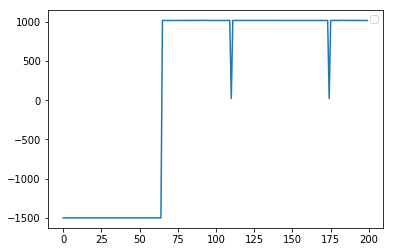

In [43]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the rewards
plt.plot(scores)

plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I have chosen takeoff task at first. But I reach really good performance, and added to reward functions some rewards for staying near target point. So at the end I have takoff + hover task. 
My reward functions consist of several parts: main reward for being close to target point (but only on Z-axis). Points for speed in Z direction if target point is not reach yet. And points for hovering around the point.
Plus after each episode I give success points for being higher than target point, and have penalty for crash.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: A have chosen Actor+Critic algorithm, with use of replay buffer. So everything like it was proposed in task. And it works really fine, when put all together and made it work properly. 
All hyper parameters I took from paper.
As well as for hyper parameters i used neural network architecture like it was describe in paper. So Actor and Critic has 2 and three hidden layers respectively, and 300-400 units in each layer. For activation functions I used Relu function, but in final layer in Actor I used Tanh, as it was said in paper. As well, I didn't forget for regularisation (used L2 regularisation) and kernel initialisation (used RandomUniform)

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It was not easy task at all, very chellanging task. The most chelanging 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: As I said earlier the most challenging was to put it all together. But when you build all architecture, the only thing is to look maybe tune some parameters.
The most amazing part, is how the model controls rotors. So I tune only reward function, but neural network controls rotors. It is stunning! 